<a href="https://colab.research.google.com/github/jpezan/TSLA-TS-Stock-Analysis/blob/main/code/TSLA_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#path = "/data/TSLA.csv"
#df = read.csv(path)

#df <- read.csv("TSLA.csv")
#View(df)

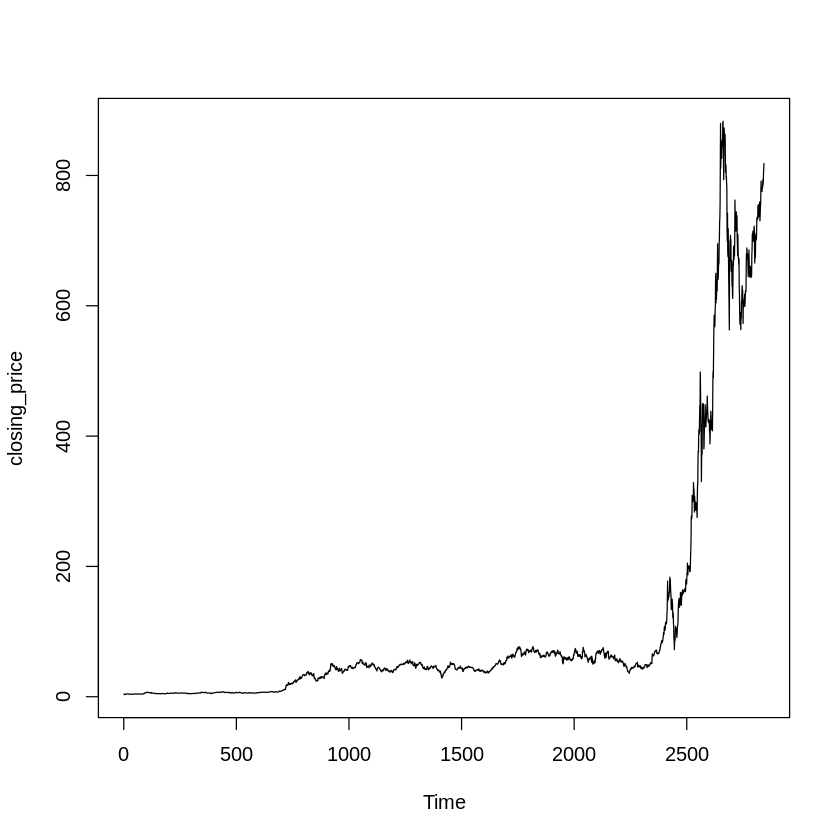

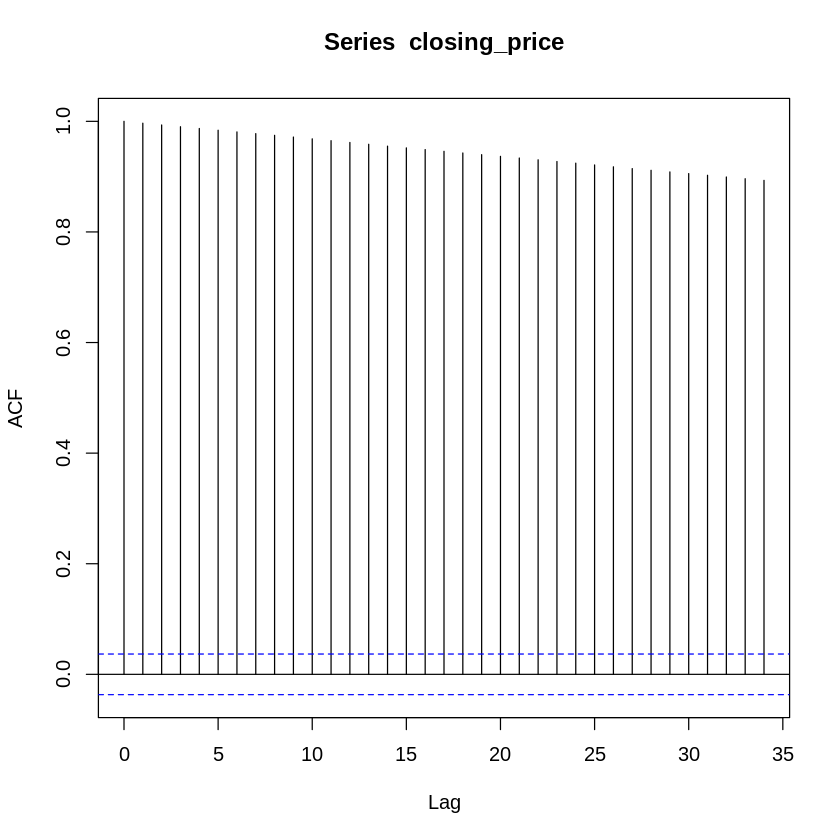

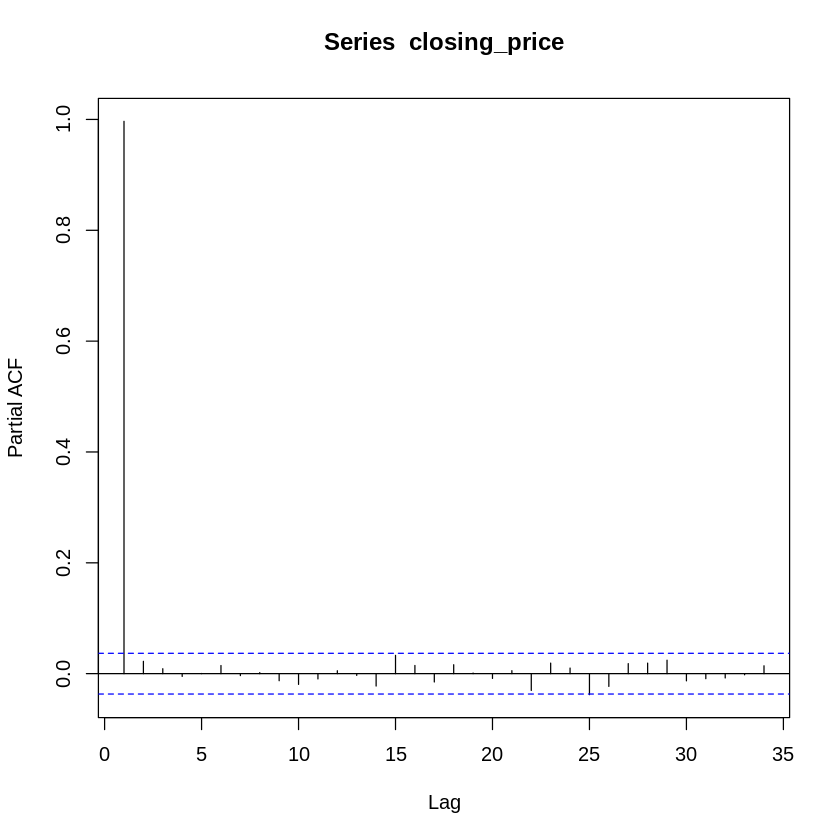

In [ ]:
closing_price <- ts(df$Close)
plot(closing_price)
acf(closing_price)
pacf(closing_price)
#ggtsdisplay(closing_price)

ACF is decaying with PACF indicating one large lag

> Indented block



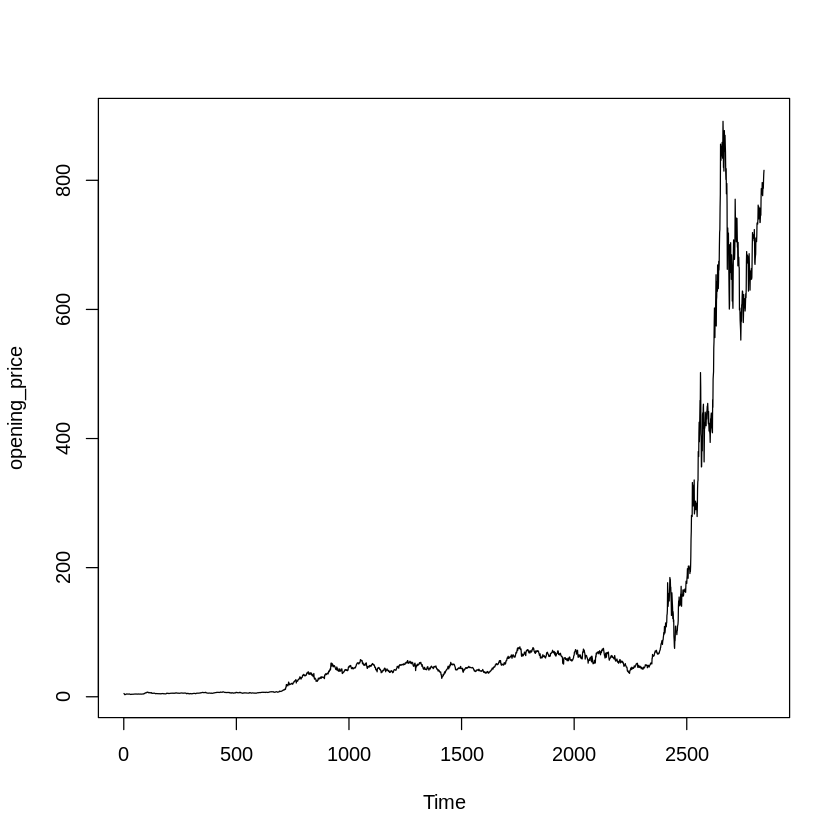

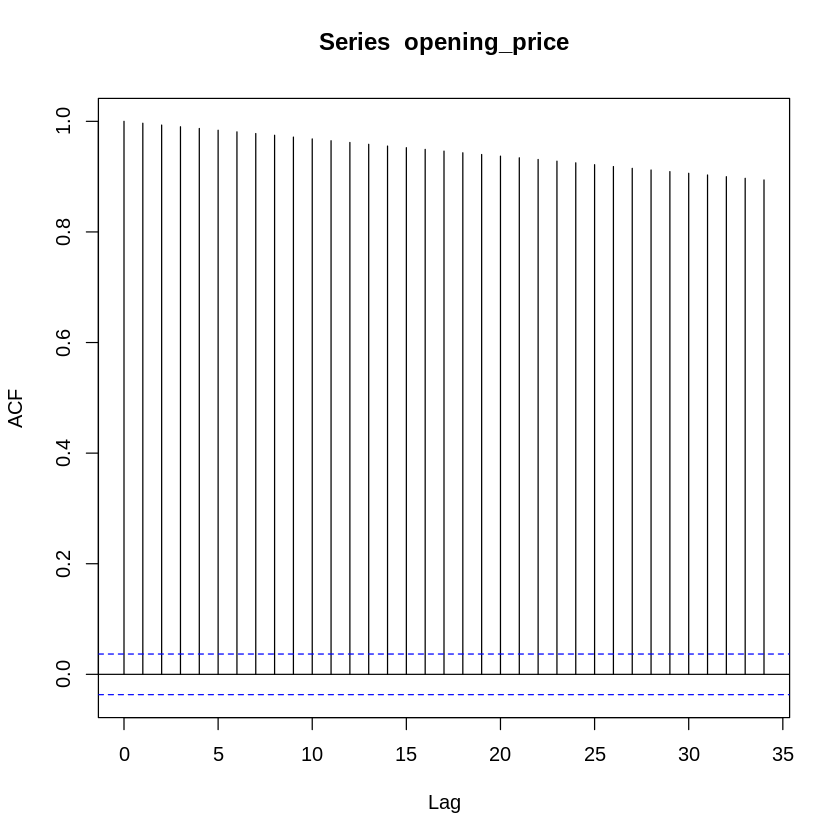

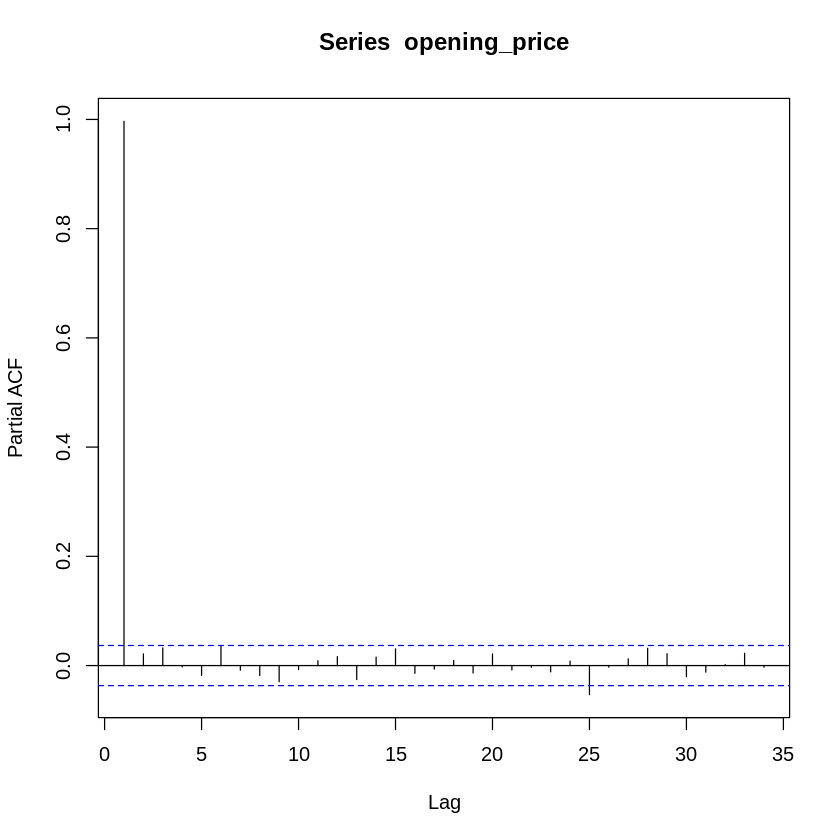

In [ ]:
opening_price <- ts(df$Open)
plot(opening_price)
acf(opening_price)
pacf(opening_price)

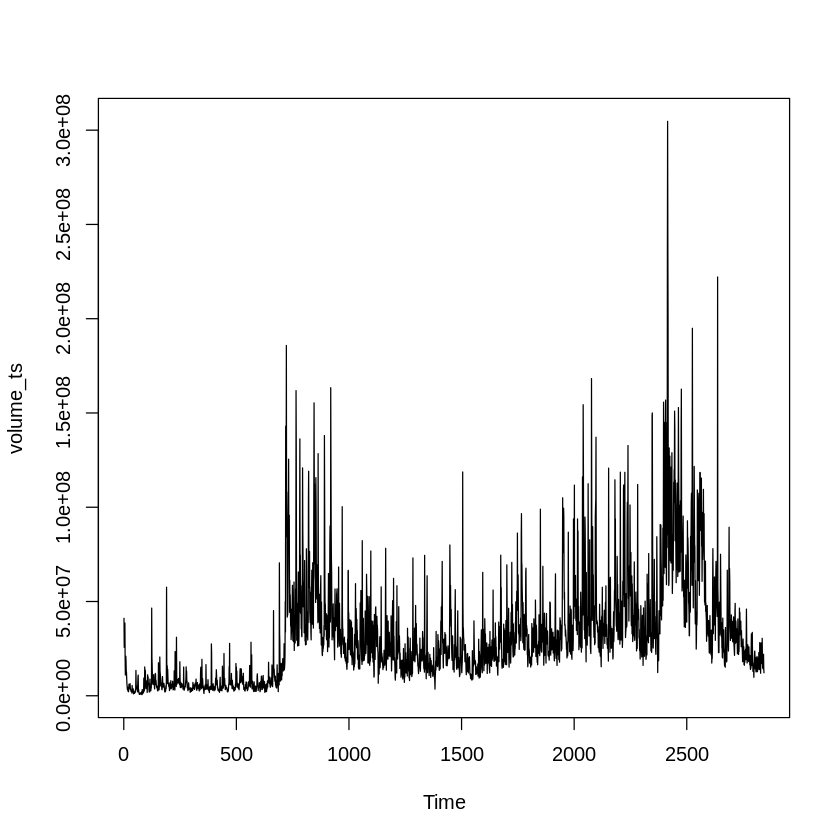

In [ ]:
volume_ts <- ts(df$Volume)
plot(volume_ts)

## EDA

,Date,Close
,<chr>,<dbl>
1,2010-07-01,4.392
2,2010-07-02,3.840
3,2010-07-06,3.222
4,2010-07-07,3.160
5,2010-07-08,3.492
6,2010-07-09,3.480


'data.frame':	2843 obs. of  2 variables:
 $ Date : chr  "2010-07-01" "2010-07-02" "2010-07-06" "2010-07-07" ...
 $ Close: num  4.39 3.84 3.22 3.16 3.49 ...
'data.frame':	2843 obs. of  2 variables:
 $ Date : Date, format: "2010-07-01" "2010-07-02" ...
 $ Close: num  4.39 3.84 3.22 3.16 3.49 ...


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



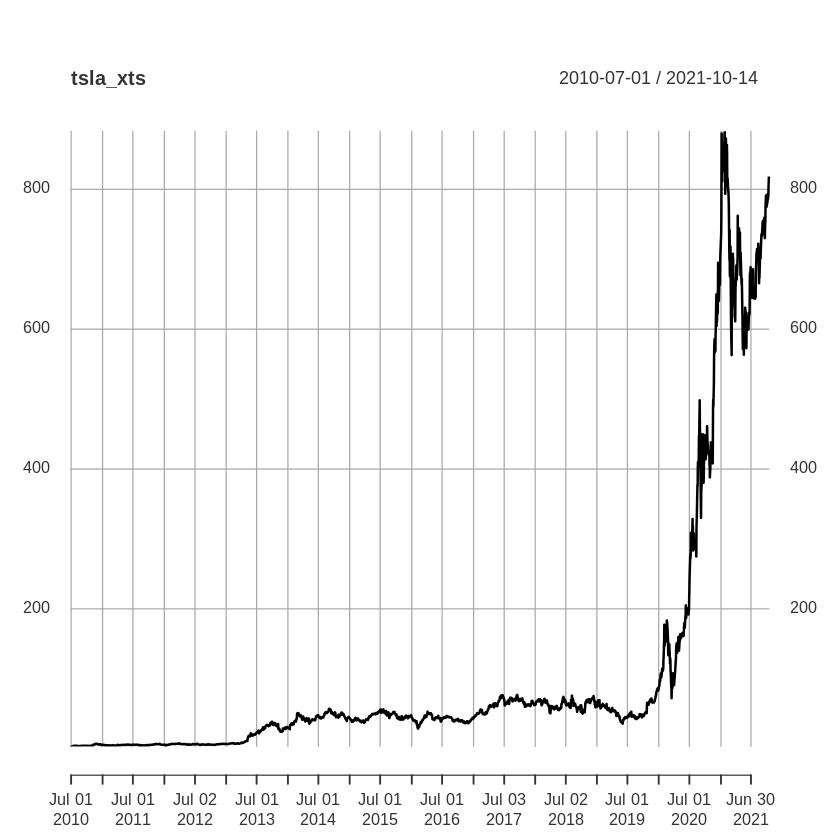

In [ ]:
#Select date and closing stock price
tsla = df[, c('Date', 'Close')]
head(tsla)
str(tsla)

#Convert date from character into date format
tsla$Date<-as.Date(paste(tsla$Date,"-01",sep=""))  # Convert to date
str(tsla)

# Read tsla using read.zoo
#install.packages('zoo')
library(zoo)
tsla_zoo <- read.zoo(tsla)

# Convert tsla_zoo to xts
#install.packages('xts')
library(xts)
tsla_xts<-as.xts(tsla_zoo)

#Plot closing price
plot(tsla_xts)

               [,1]
2010-07-01 1.479785
2010-07-02 1.345472
2010-07-06 1.170002
2010-07-07 1.150572
2010-07-08 1.250475

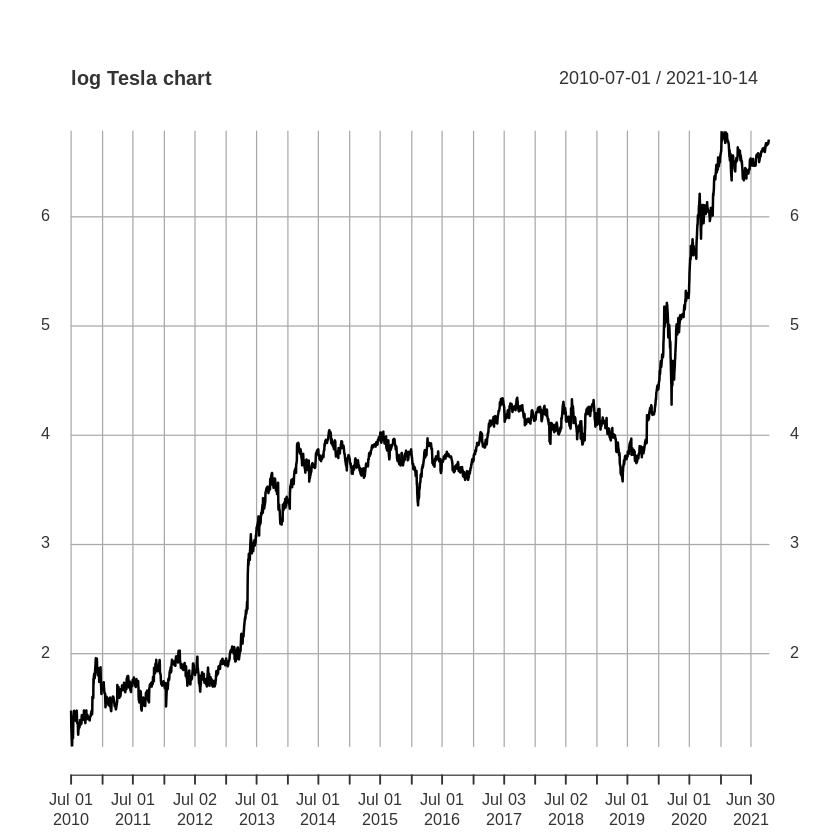

In [ ]:
#Log Transformation
tsla_log <- log(tsla_xts)
head(tsla_log, n = 5)
plot(tsla_log, main = "log Tesla chart")

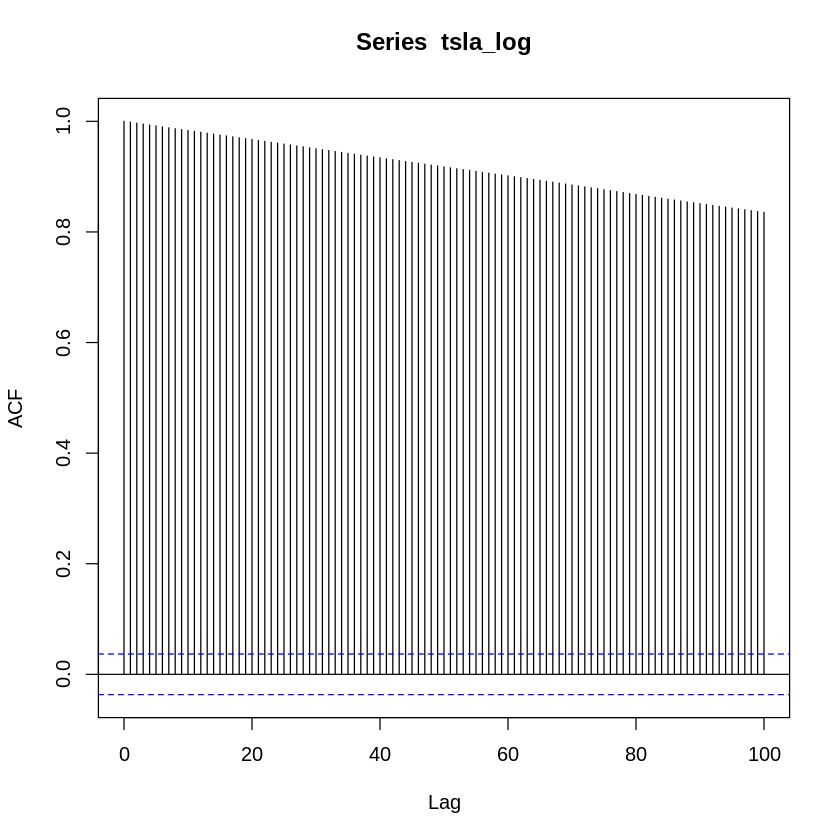

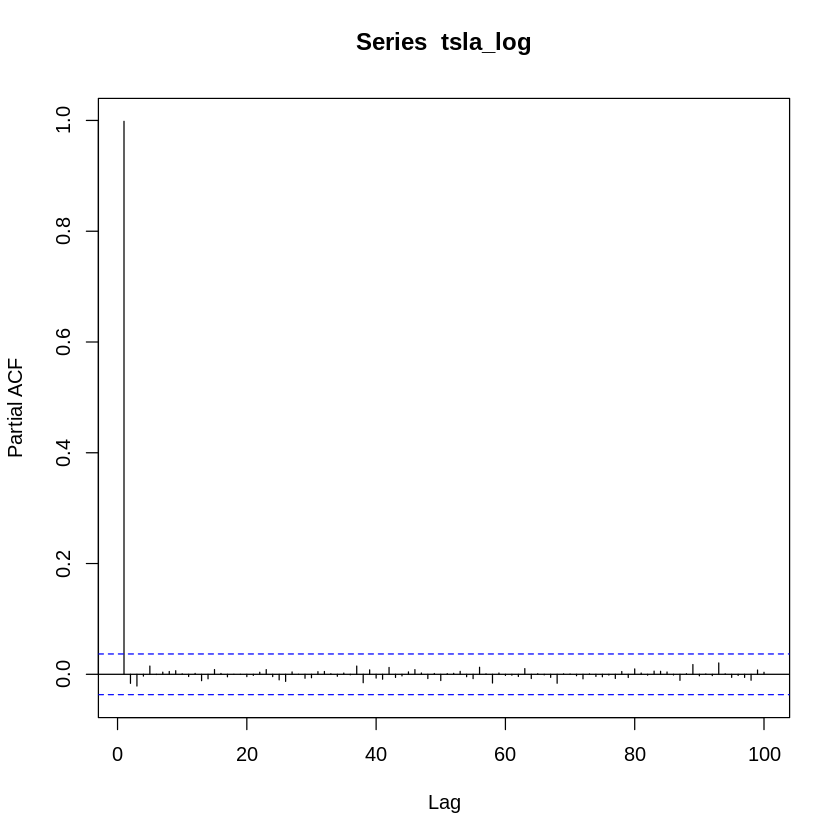

In [ ]:
#Autocorrelation 
acf_log <- acf(tsla_log, lag.max = 100)
pacf_log <- pacf(tsla_log, lag.max = 100)

In [ ]:
#ADF and KPSS tests
#install.packages('tseries')
library(tseries)
adf.test(tsla_log)
kpss.test(tsla_log)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quadprog’, ‘quantmod’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 




	Augmented Dickey-Fuller Test

data:  tsla_log
Dickey-Fuller = -1.4329, Lag order = 14, p-value = 0.8184
alternative hypothesis: stationary


Warning message in kpss.test(tsla_log):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  tsla_log
KPSS Level = 22.966, Truncation lag parameter = 9, p-value = 0.01


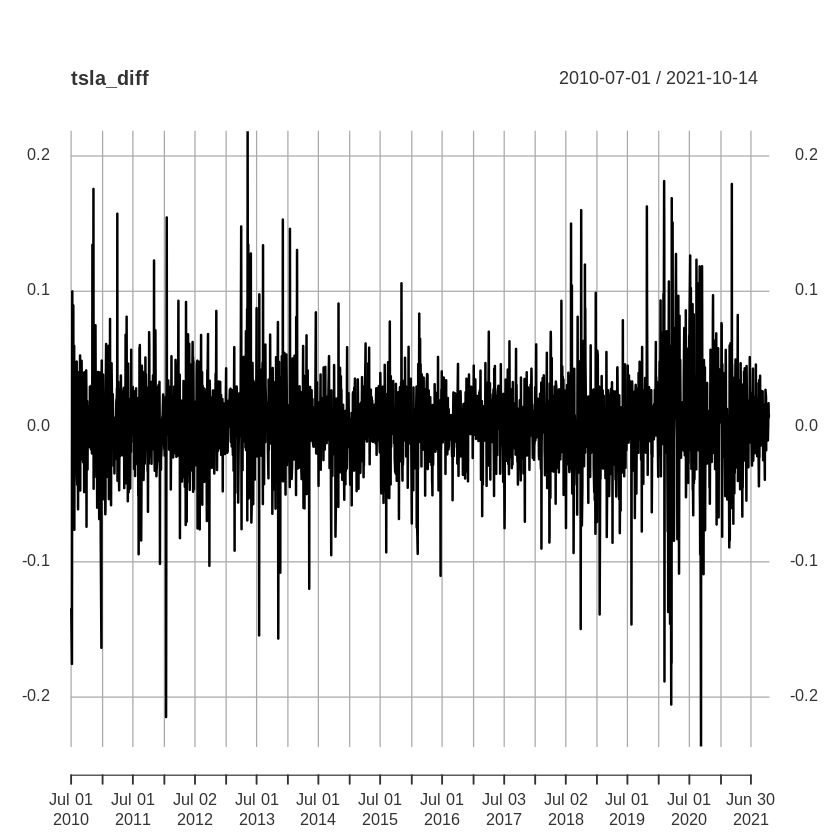

In [ ]:
#Differencing Logged Data
tsla_diff <- diff(tsla_log, lag = 1)

tsla_diff <- na.locf(tsla_diff, na.rm = TRUE,
                     fromLast = TRUE)
plot(tsla_diff)

# ARIMA

In [ ]:
#Split into test and train
train <- tsla_diff["2010-01/2018-12"]  # all closes in 2010-2018
test <- tsla_diff["2019-01/2019-12"]   # all closes in 2019

head(train)
head(test)

                   [,1]
2010-07-01 -0.134312338
2010-07-02 -0.134312338
2010-07-06 -0.175470082
2010-07-07 -0.019430257
2010-07-08  0.099902610
2010-07-09 -0.003442344

                   [,1]
2019-01-02 -0.070582392
2019-01-03 -0.031977549
2019-01-04  0.056094294
2019-01-07  0.052935044
2019-01-08  0.001163686
2019-01-09  0.009437967

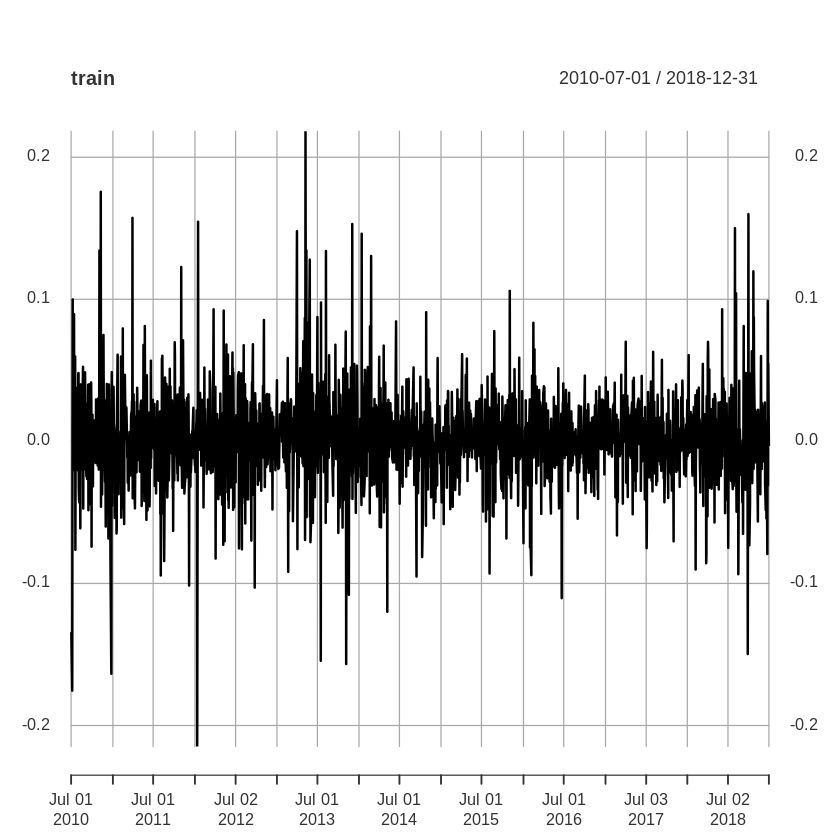

In [ ]:
plot(train)

In [ ]:
install.packages("forecast")
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




 Fitting models using approximations to speed things up...

 ARIMA(2,0,2) with non-zero mean : -8646.554
 ARIMA(0,0,0) with non-zero mean : -8593.142
 ARIMA(1,0,0) with non-zero mean : -8607.653
 ARIMA(0,0,1) with non-zero mean : -8591.148
 ARIMA(0,0,0) with zero mean     : -8592.187
 ARIMA(1,0,2) with non-zero mean : -8630.912
 ARIMA(2,0,1) with non-zero mean : -8637.875
 ARIMA(3,0,2) with non-zero mean : -8654.968
 ARIMA(3,0,1) with non-zero mean : -8650.433
 ARIMA(4,0,2) with non-zero mean : -8661.57
 ARIMA(4,0,1) with non-zero mean : -8650.379
 ARIMA(5,0,2) with non-zero mean : -8662.284
 ARIMA(5,0,1) with non-zero mean : -8653.241
 ARIMA(5,0,3) with non-zero mean : -8660.277
 ARIMA(4,0,3) with non-zero mean : -8662.883
 ARIMA(3,0,3) with non-zero mean : -8661.818
 ARIMA(4,0,4) with non-zero mean : Inf
 ARIMA(3,0,4) with non-zero mean : -8659.843
 ARIMA(5,0,4) with non-zero mean : -8664.293
 ARIMA(5,0,5) with non-zero mean : Inf
 ARIMA(4,0,5) with non-zero mean : -8659.63
 ARIMA(5

Series: train 
ARIMA(4,0,2) with non-zero mean 

Coefficients:
          ar1      ar2      ar3      ar4     ma1     ma2    mean
      -1.0387  -0.8543  -0.0285  -0.0333  1.0411  0.8409  0.0012
s.e.   0.1656   0.1703   0.0323   0.0225  0.1647  0.1682  0.0007

sigma^2 = 0.001056:  log likelihood = 4300.23
AIC=-8584.47   AICc=-8584.4   BIC=-8539.12

Training set error measures:
                        ME       RMSE        MAE MPE MAPE      MASE
Training set -1.634532e-05 0.03243892 0.02241955 NaN  Inf 0.6907009
                     ACF1
Training set 0.0004602957


	Ljung-Box test

data:  Residuals from ARIMA(4,0,2) with non-zero mean
Q* = 2.7419, df = 3, p-value = 0.4331

Model df: 7.   Total lags used: 10



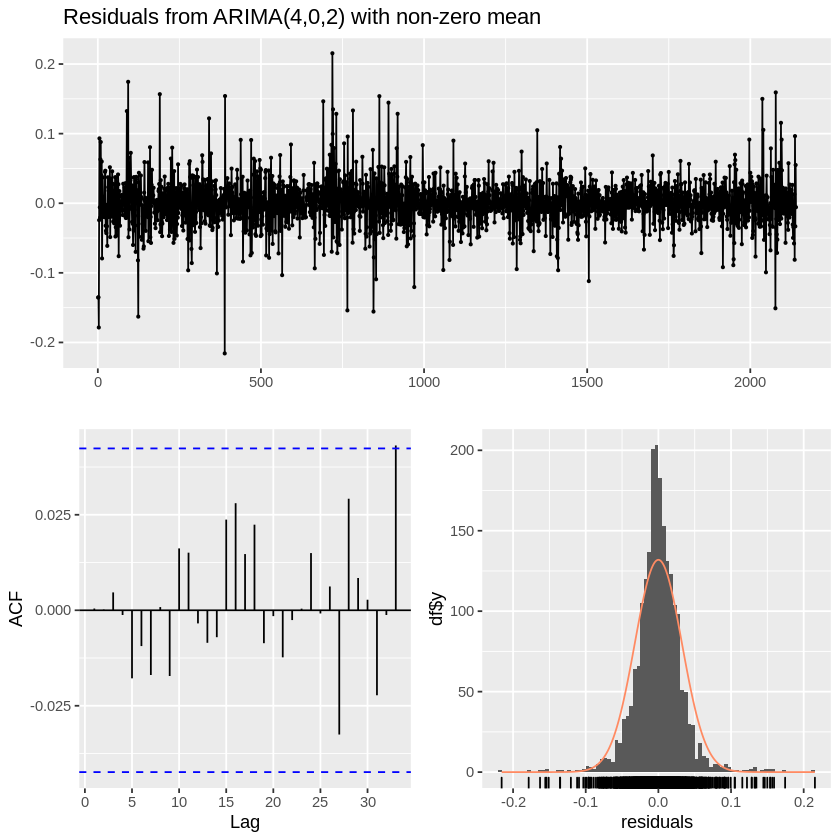

In [ ]:
#Find base model using auto arima on the tesla difference stock
base_mod <- auto.arima(train, ic = c("aicc", "aic", "bic"), trace = TRUE)
summary(base_mod)

checkresiduals(base_mod)


Series: train_log 
ARIMA(4,0,2) with non-zero mean 

Coefficients:
          ar1     ar2     ar3     ar4     ma1     ma2    mean
      -0.3980  0.9021  0.4707  0.0243  1.3937  0.4692  3.1442
s.e.   0.8919  0.4046  0.8579  0.0268  0.8930  0.8554  1.1293

sigma^2 = 0.00105:  log likelihood = 4302.33
AIC=-8588.67   AICc=-8588.6   BIC=-8543.32

Training set error measures:
                      ME       RMSE        MAE        MPE      MAPE     MASE
Training set 0.001274695 0.03235171 0.02238432 0.03304805 0.8605829 1.000693
                     ACF1
Training set 0.0005226973


	Ljung-Box test

data:  Residuals from ARIMA(4,0,2) with non-zero mean
Q* = 4.5168, df = 3, p-value = 0.2108

Model df: 7.   Total lags used: 10



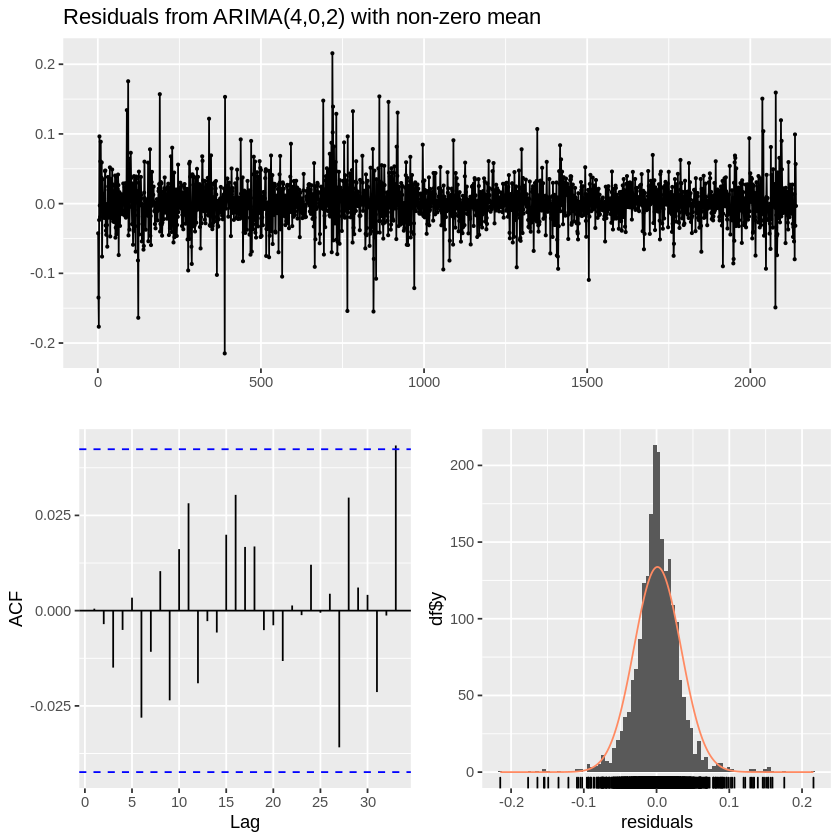

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.001274695,0.03235171,0.02238432,0.03304805,0.8605829,1.000693,0.0005226973
Test set,-0.172473167,0.25757403,0.22286325,-4.55911533,5.7262350,9.963118,NA


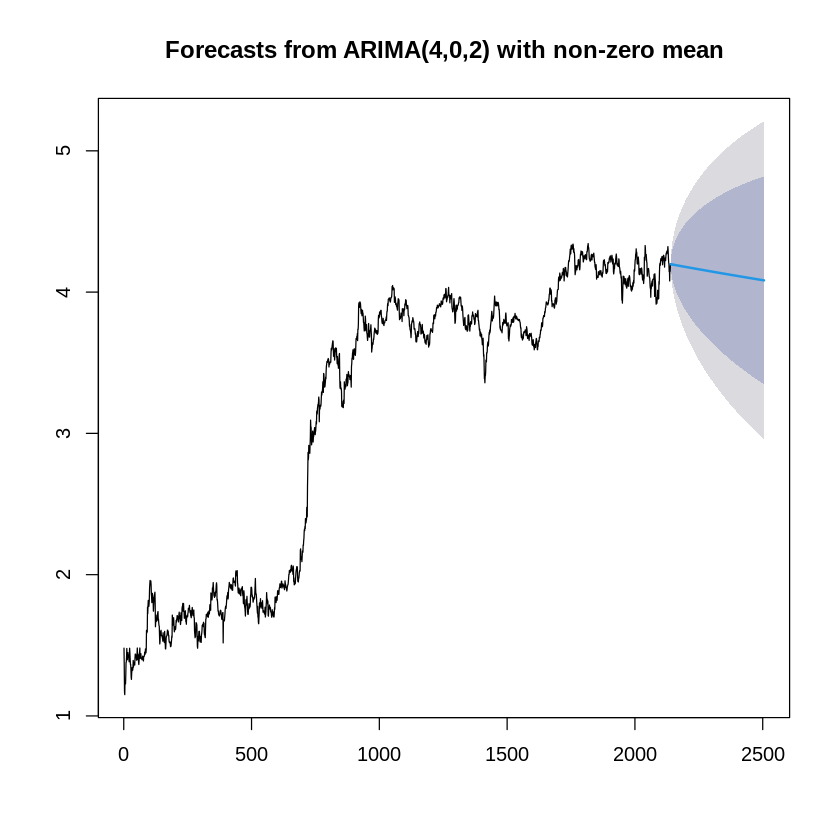

In [ ]:
#Arima Model fitting training tesla logged stocks

train_log <- tsla_log["2010-01/2018-12"]  # all closes in 2010-2018
test_log <- tsla_log["2019-01/2019-12"]   # all closes in 2019

model1 <- Arima(train_log, order = c(4,0,2))
summary(model1)
checkresiduals(model1)

model1_frcst<-forecast(model1, h=365)
plot(model1_frcst)
accuracy(model1_frcst, test_log)

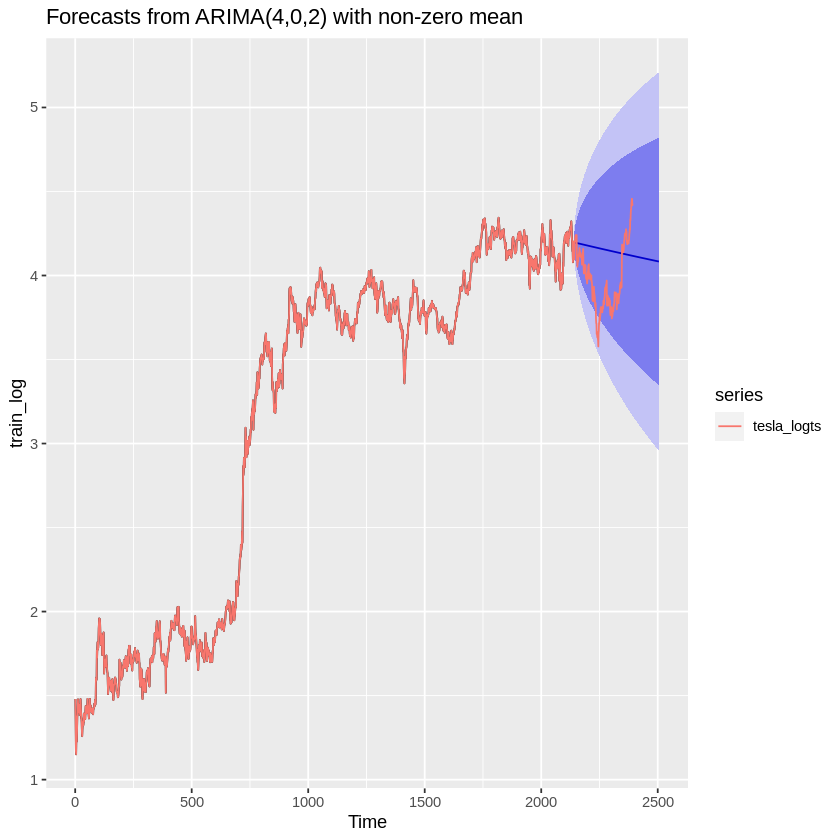

In [ ]:
#Plot logged stock and forecast
tesla_logts <- ts(tsla_log["2010-01/2019-12"])
model1_frcst %>% autoplot() + autolayer(tesla_logts)

# Holt Winters

Note: Data was split into train and test same as above

In [ ]:
#install.packages("zoo")
#install.packages("xts")
#install.packages("forecast")
library(zoo)
library(xts)
library(forecast)
library(tseries)

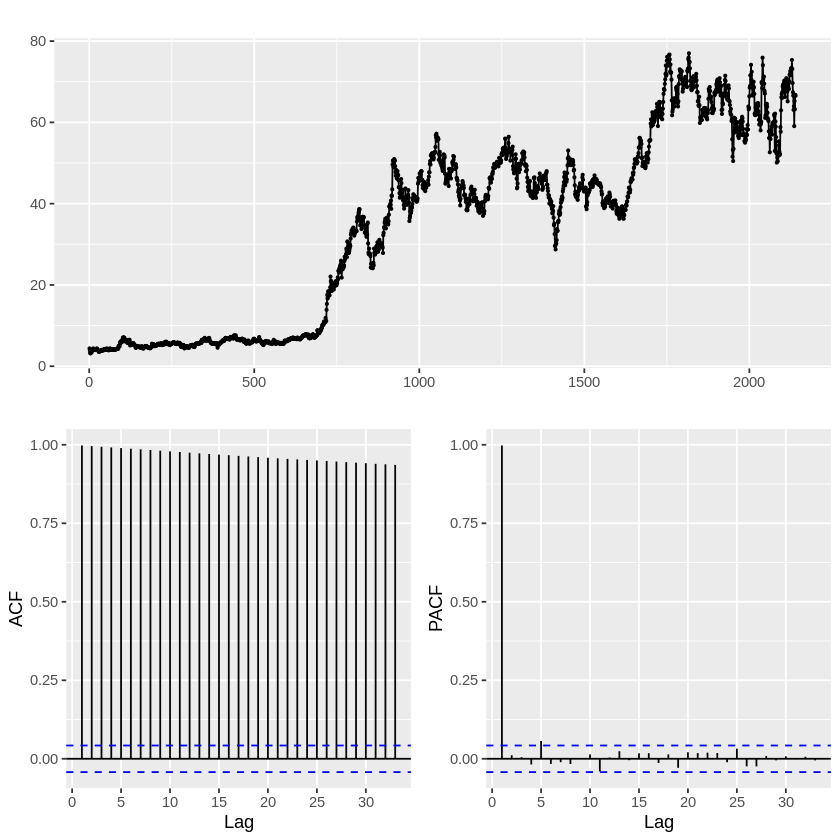

In [ ]:
ggtsdisplay(train)

In [ ]:
kpss.test(train, null = "Trend")

Warning message in kpss.test(train, null = "Trend"):
“p-value smaller than printed p-value”



	KPSS Test for Trend Stationarity

data:  train
KPSS Trend = 1.2686, Truncation lag parameter = 8, p-value = 0.01


Data is not stationary
- ACF does not show exponential decay
- KPSS test - reject the null hypothesis

In [ ]:
dfts <- ts(train, frequency=12)

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = dfts)

Smoothing parameters:
 alpha: 0.9690921
 beta : 0
 gamma: 0.2257386

Coefficients:
            [,1]
a   66.604582427
b    0.044317890
s1   0.008038188
s2  -0.053153469
s3  -0.217599925
s4  -0.347443851
s5  -0.003507726
s6   0.027141664
s7   0.169077246
s8   0.176512265
s9   0.133175349
s10 -0.094299207
s11  0.017706624
s12 -0.041738162

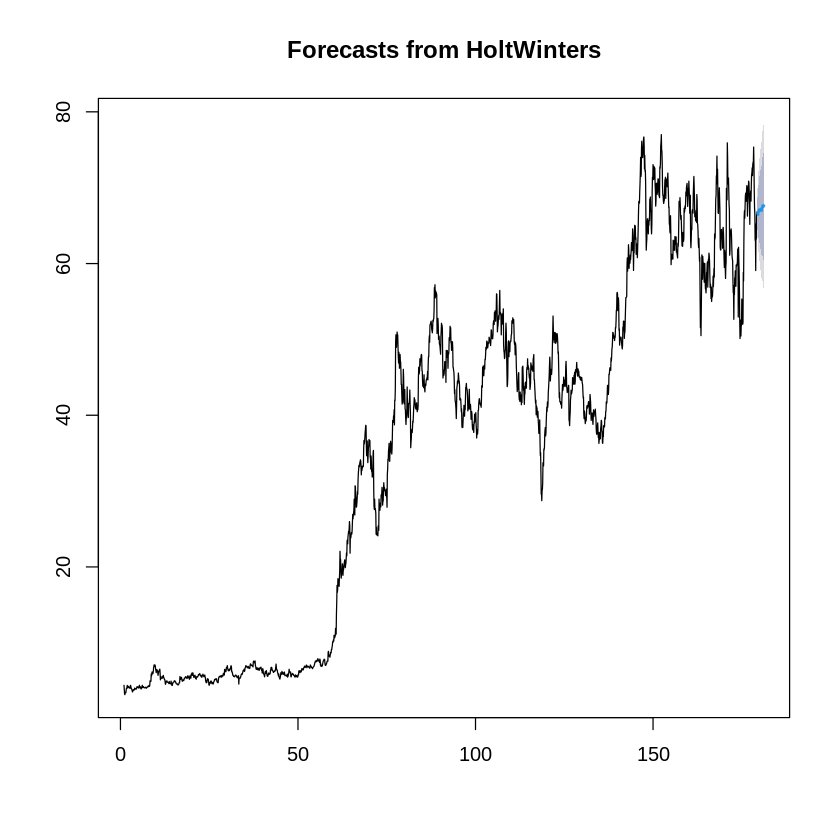

In [ ]:
fit <- HoltWinters(dfts)
fit
plot(forecast(fit, h=365))

Smoothing parameters:
- alpha: 0.9730454
- beta : 0.008943327
- gamma: 0.2257386

The estimated values of alpha, beta and gamma are 0.9730454, 0.00, and 0.2257386, respectively. The value of alpha (0.9730454) is relatively high, indicating that the estimate of the level at the current time point is based upon observations in the more distant past. The value of beta is 0.00, indicating that the estimate of the slope b of the trend component is not updated over the time series, and instead is set equal to its initial value. This makes good intuitive sense, as the level changes quite a bit over the time series, but the slope b of the trend component remains roughly the same. Similarly, the value of gamma (0.2257386) is low, indicating that the estimate of the seasonal component at the current time point is not based on recent observations.


**Forecasts made by Holt winters (values)**

In [ ]:
fitted_vals <- fit$fitted
head(fitted_vals)

,xhat,level,trend,season
Jan 2,3.701015,3.699274,0.04431789,-0.042576389
Feb 2,4.028222,4.091481,0.04431789,-0.107576389
Mar 2,4.224580,4.151089,0.04431789,0.029173611
Apr 2,4.293661,4.171586,0.04431789,0.077756944
May 2,4.215920,4.181345,0.04431789,-0.009743056
Jun 2,4.149619,4.200544,0.04431789,-0.095243056


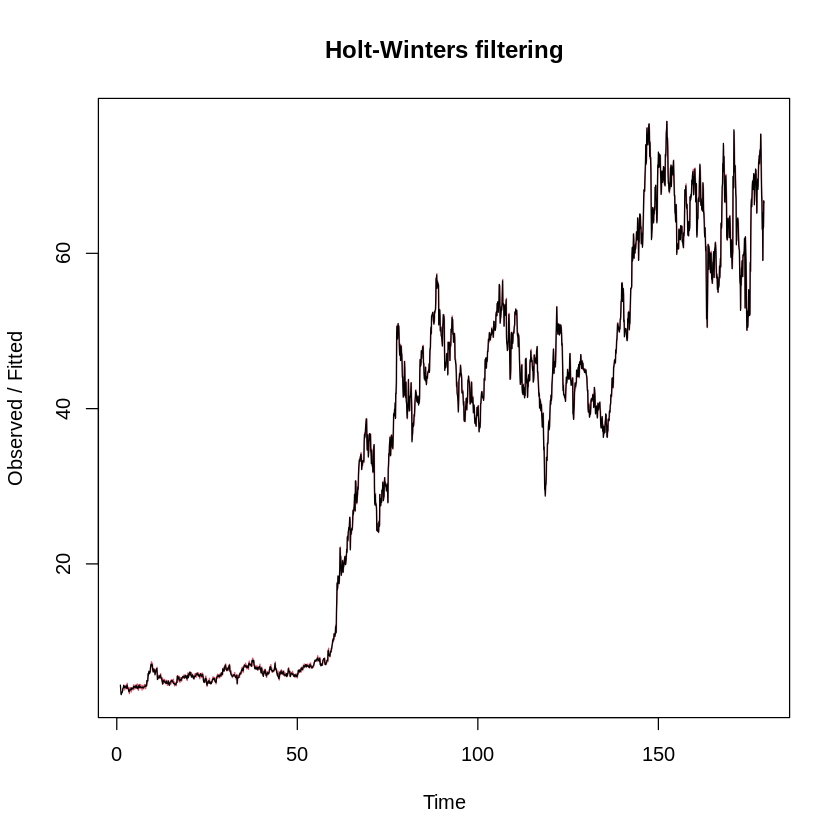

In [ ]:
plot(fit)

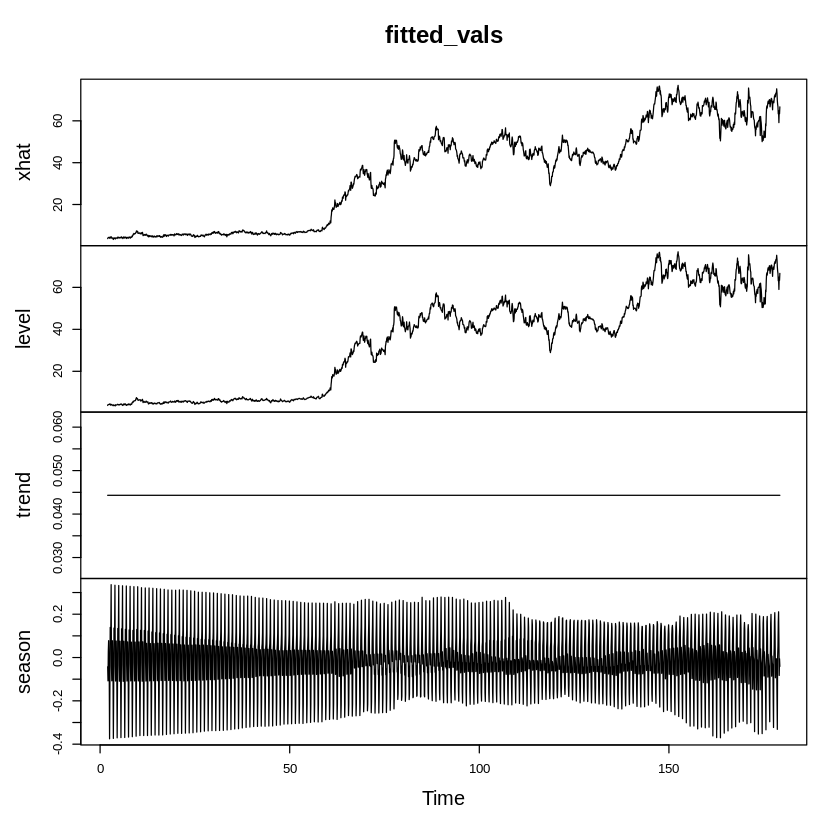

In [ ]:
plot(fitted_vals)

The plot shows the original time series in black, and the forecasts as a red line. The time series of forecasts fits the data set very well.

In [ ]:
fit$SSE

[1] 3030.37

In [ ]:
fit2 <- forecast:::forecast.HoltWinters(fit, h=365)
head(fit2)

$method
[1] "HoltWinters"

$model
Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = dfts)

Smoothing parameters:
 alpha: 0.9690921
 beta : 0
 gamma: 0.2257386

Coefficients:
            [,1]
a   66.604582427
b    0.044317890
s1   0.008038188
s2  -0.053153469
s3  -0.217599925
s4  -0.347443851
s5  -0.003507726
s6   0.027141664
s7   0.169077246
s8   0.176512265
s9   0.133175349
s10 -0.094299207
s11  0.017706624
s12 -0.041738162

$level
[1] 80 95

$mean
         Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
179                                     66.65694 66.64006 66.51994 66.43441
180 67.13662 66.95346 67.10979 67.09466 67.18875 67.17188 67.05175 66.96622
181 67.66843 67.48528 67.64160 67.62647 67.72057 67.70369 67.58357 67.49804
182 68.20025 68.01709 68.17342 68.15829 68.25238 68.23551 68.11538 68.02985
183 68.73206 68.54891 68.70523 68.69010                                    
         Sep      Oct      Nov      De

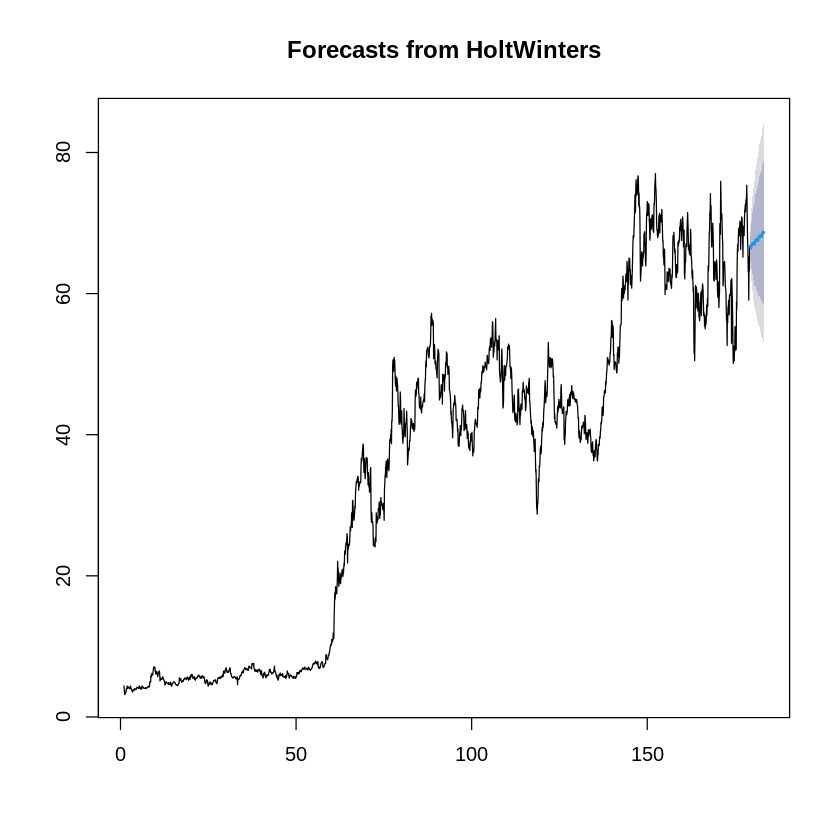

In [ ]:
plot(forecast(fit2))

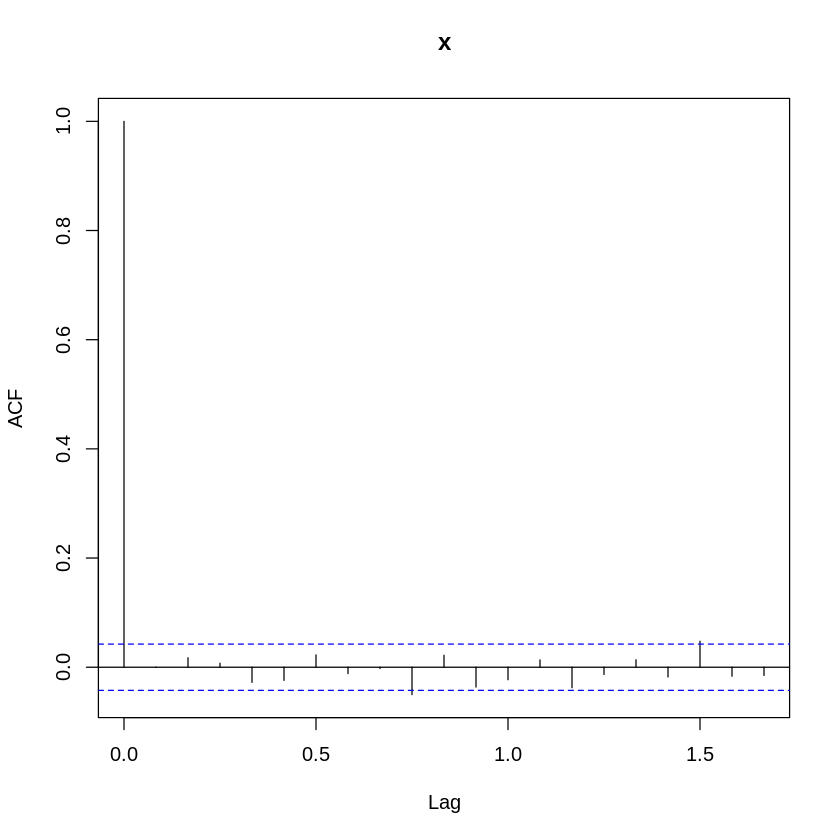

In [ ]:
acf(fit2$residuals, na.action = na.pass, lag.max=20)

The autocorrelation at lag 0.75 and 1.5 exceed the significance bounds which is indicative of an autoregressive process

Ljung-Box test to test whether there is significant evidence for non-zero correlations at lags 1-20

In [ ]:
Box.test(fit2$residuals, lag=20, type="Ljung-Box")


	Box-Ljung test

data:  fit2$residuals
X-squared = 26.243, df = 20, p-value = 0.1579


Here the Ljung-Box test statistic is 26.243, and the p-value is 0.1579, so there is little evidence of non-zero autocorrelations in the sample forecast errors at lags 1-20.


       x           
 Min.   :-8.53924  
 1st Qu.:-0.37478  
 Median :-0.03748  
 Mean   :-0.01523  
 3rd Qu.: 0.36967  
 Max.   : 9.49664  
 NA's   :12        

Warning message in modeldf.default(object):
“Could not find appropriate degrees of freedom for this model.”


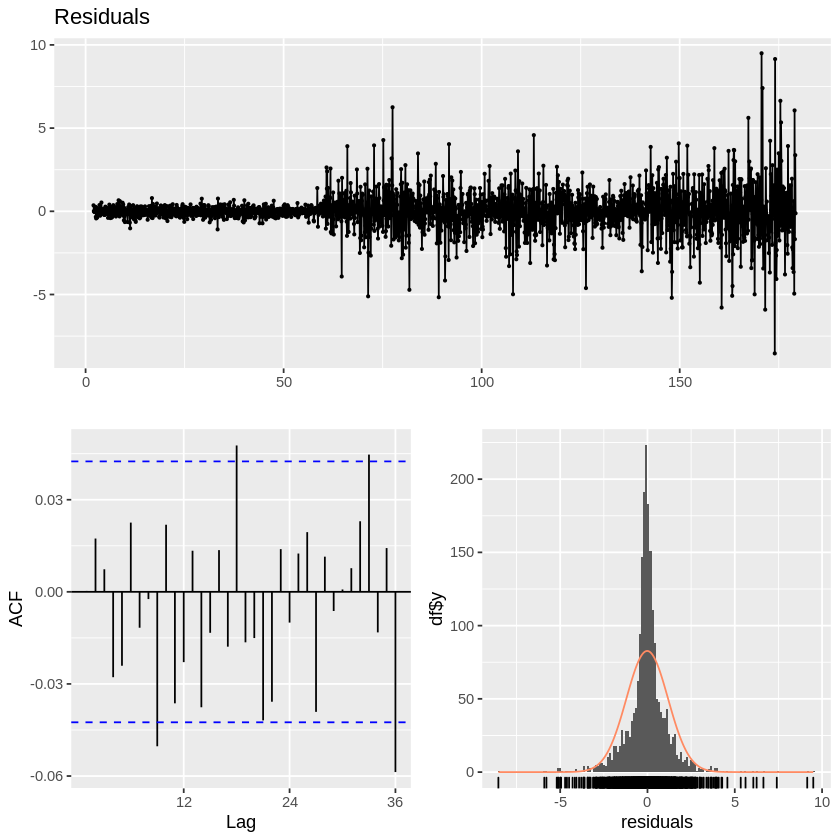

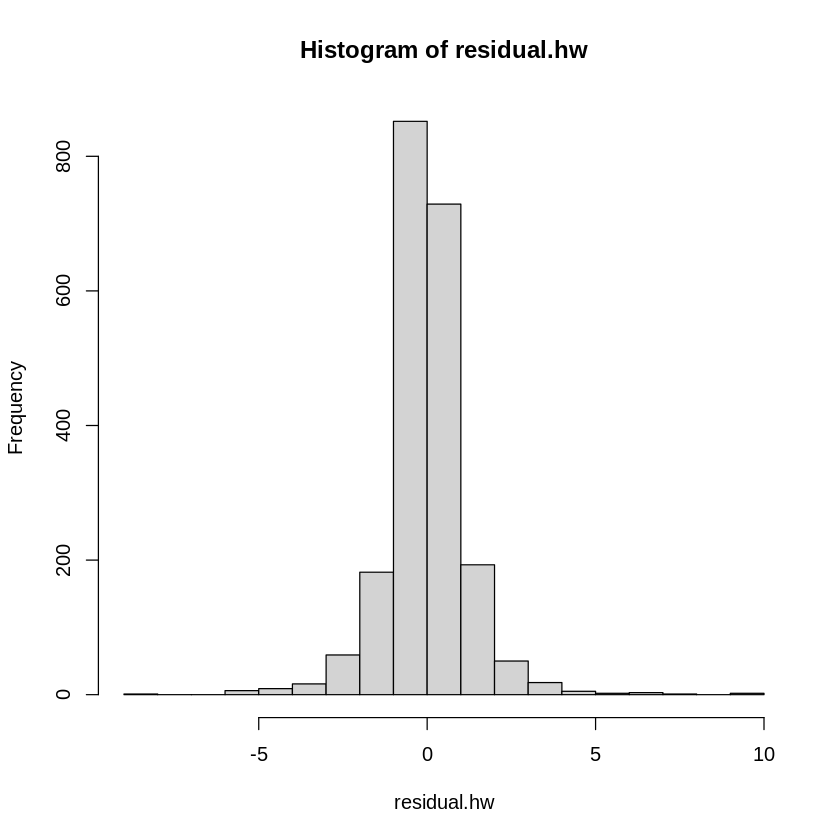

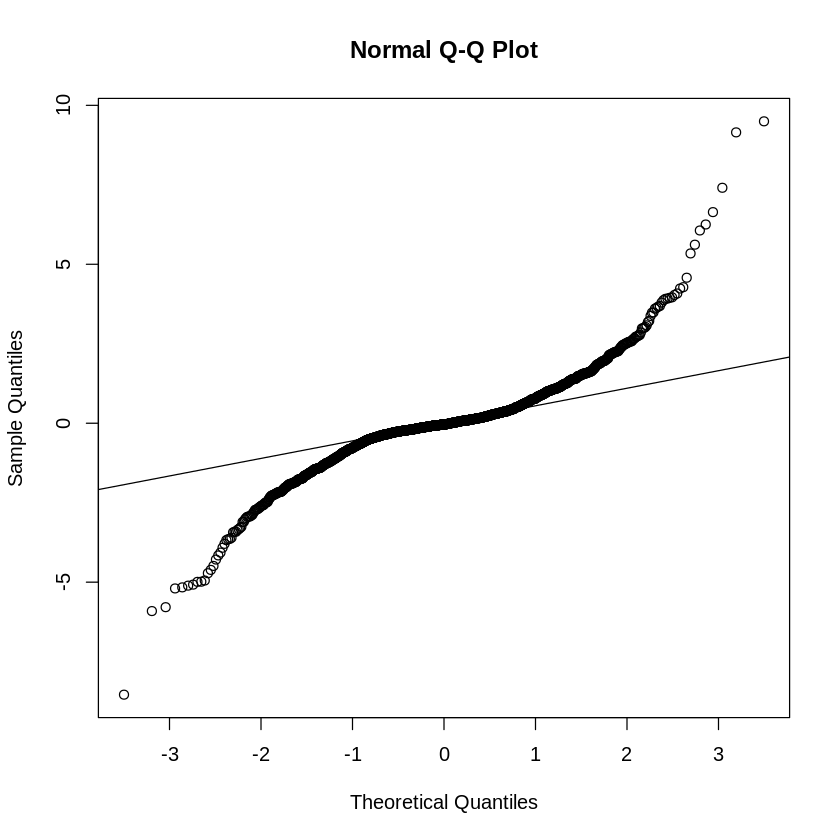

In [ ]:
residual.hw <- residuals(fit2)
summary(residual.hw)
checkresiduals(residual.hw)
hist(residual.hw)
qqnorm(residual.hw)
qqline(residual.hw)

Variance increases over time for forecast errors. 

The plot shows that the distribution of forecast errors is roughly centred on zero, and is more or less normally distributed, although it seems to be slightly skewed to the right compared to a normal curve. However, the right skew is relatively small, and so it is plausible that the forecast errors are normally distributed with mean zero

The Ljung-Box test showed that there is little evidence of non-zero autocorrelations in the in-sample forecast errors, and the distribution of forecast errors seems to be normally distributed with mean zero. This suggests that the simple exponential smoothing method provides an adequate predictive model for Tesla stock, which probably cannot be improved upon. Furthermore, the assumptions that the 80% and 95% predictions intervals were based upon (that there are no autocorrelations in the forecast errors, and the forecast errors are normally distributed with mean zero and constant variance) are probably valid.

In [ ]:
dataframe <- ts(train, frequency = 365)
library(forecast)
fit <- HoltWinters(dataframe)
fitt <- forecast(fit, h=365)
plot(fitt)
summary(fitt)

In [ ]:
accuracy(fitt, test)

In [ ]:
checkresiduals(fit)

In [ ]:
autoplot(decompose(fitted_vals))

In [ ]:
# additive error, trend and seasonality
AAA <- ets(dfts, model = "AAA")
AAA.hw <- forecast(AAA, h = 365)
accuracy(AAA.hw, test) 
# multiplicative error, additive trend and seasonality
MAA <- ets(dfts, model = "MAA")
MAA.HW <- forecast(MAA, h = 365)
accuracy(MAA.HW, test)
# additive error and trend and multiplicative seasonality
AAM <- ets(dfts, model = "AAM", restrict = FALSE)
AAM.HW <- forecast(AAM, h = 365)
accuracy(AAM.HW, test)
# multiplicative error, additive trend, and multiplicative seasonality
MAM <- ets(dfts, model = "MAM")
MAM.HW <- forecast(MAM, h = 365)
accuracy(MAM.HW, test)
# multiplicative error, no additive trend, and no multiplicative seasonality
MNN2 <- ets(dfts, model = "MNN")
MNN2.HW <- forecast(MNN2, h = 365)
accuracy(MNN2.HW, test)

In [ ]:
plot(MAM.HW)

In [ ]:
ZZZ <- ets(dfts, model = "ZZZ")
summary(ZZZ)
ZZZ.HW <- forecast(ZZZ, h = 365)
accuracy(ZZZ.HW, test)

# GARCH


Note: Data was split into train and test same as above

In [ ]:
install.packages("PerformanceAnalytics")
install.packages("rugarch")
install.packages("quantmod")
install.packages("tseries")
library(dplyr)
library(tidyverse)
library(tidyr)
library(tseries)
library(rugarch)
library(PerformanceAnalytics)
library(quantmod)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘quadprog’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘chron’, ‘SkewHyperbolic’, ‘Rcpp’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:xts’:

    first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = 

Graph both spliced years vs trian data

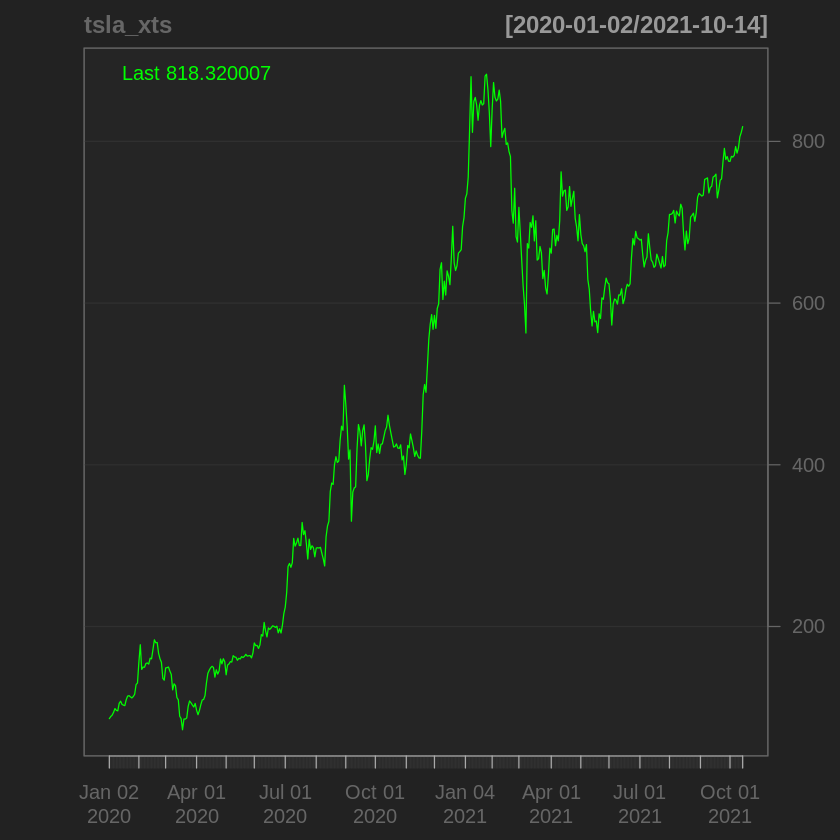

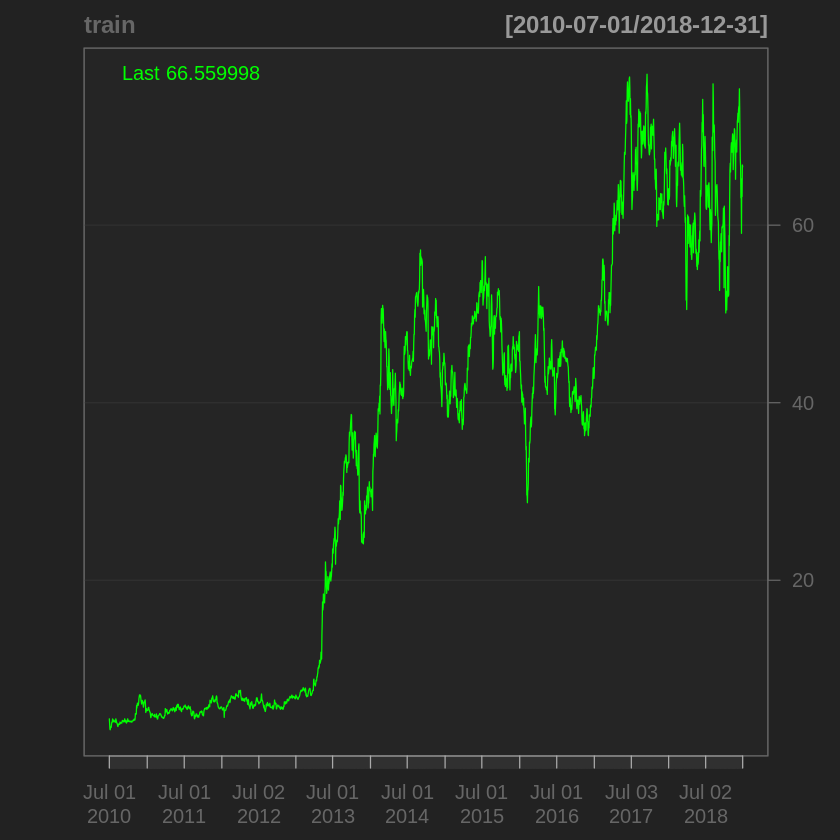

In [ ]:

#view dates we spliced from the model due to 2020 economic impacts
chartSeries(tsla_xts, subset ='2020::2021')

#view train dataset

chartSeries(train)


Calculate Returns and Plot Distribution

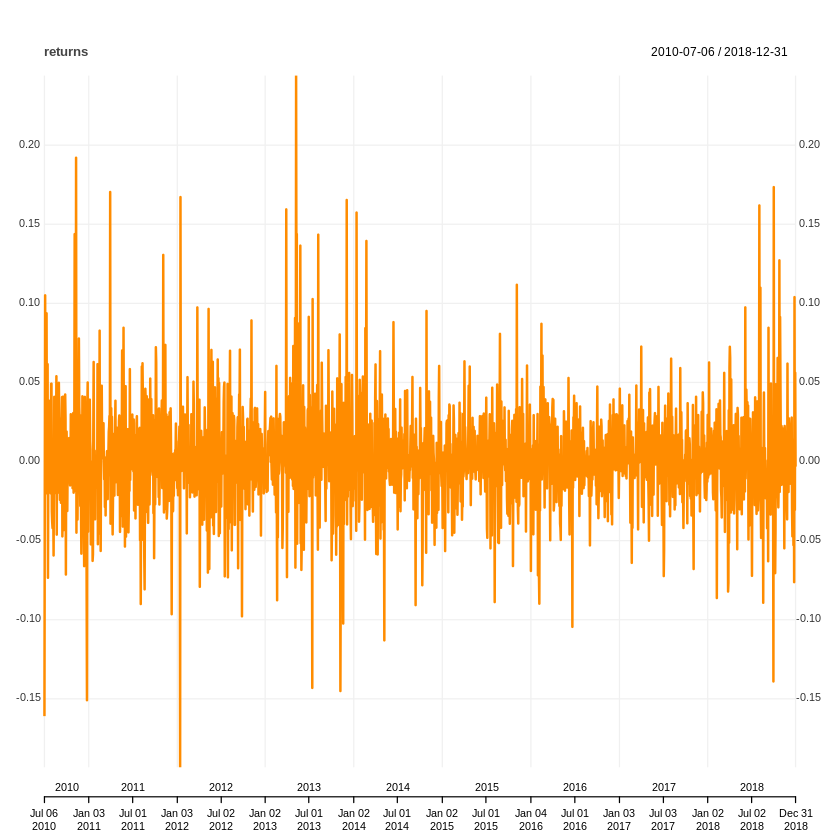

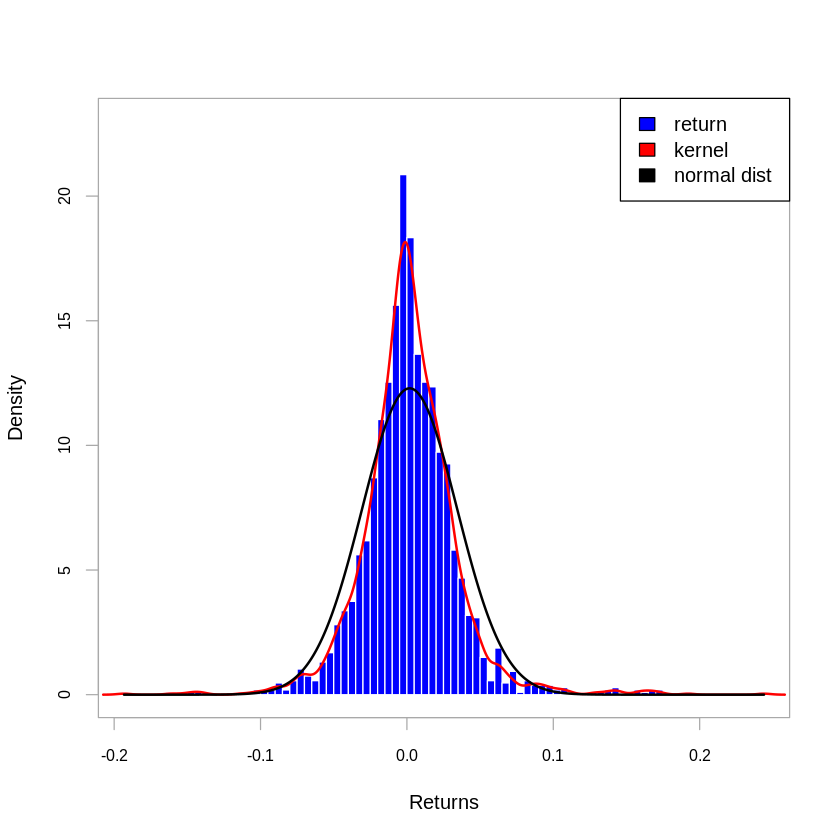

In [ ]:
returns <- CalculateReturns(train) %>% na.omit()

returns <- returns[-c(1),]

chart_Series(returns)

chart.Histogram(returns, method = c('add.density','add.normal'), colorset = c('blue','red','black'))
legend("topright", legend = c("return","kernel","normal dist"), fill = c('blue','red','black'))

Volatility

In [ ]:
```{r}


sqrt(252)*sd(returns["2018"])  #252 is yearly frequency, 22 for month


#calcualte rolling volataility for one month and four months
par(mfrow=c(2,1))
chart.RollingPerformance(R = returns["2010::2018"], width = 22, FUN = "sd.annualized", scale=252, main = "One Month Rolling Volatility")

chart.RollingPerformance(R = returns["2010::2018"], width = 88, FUN = "sd.annualized", scale=252, main = "Four Month Rolling Volatility")


ERROR: ignored

Predict Volatility in 2019

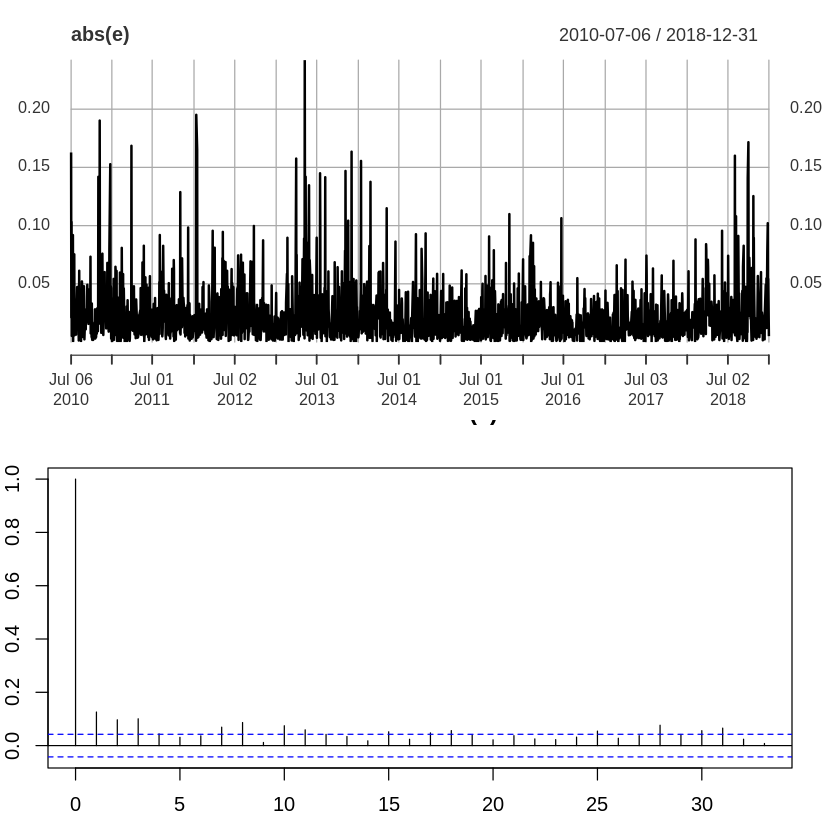

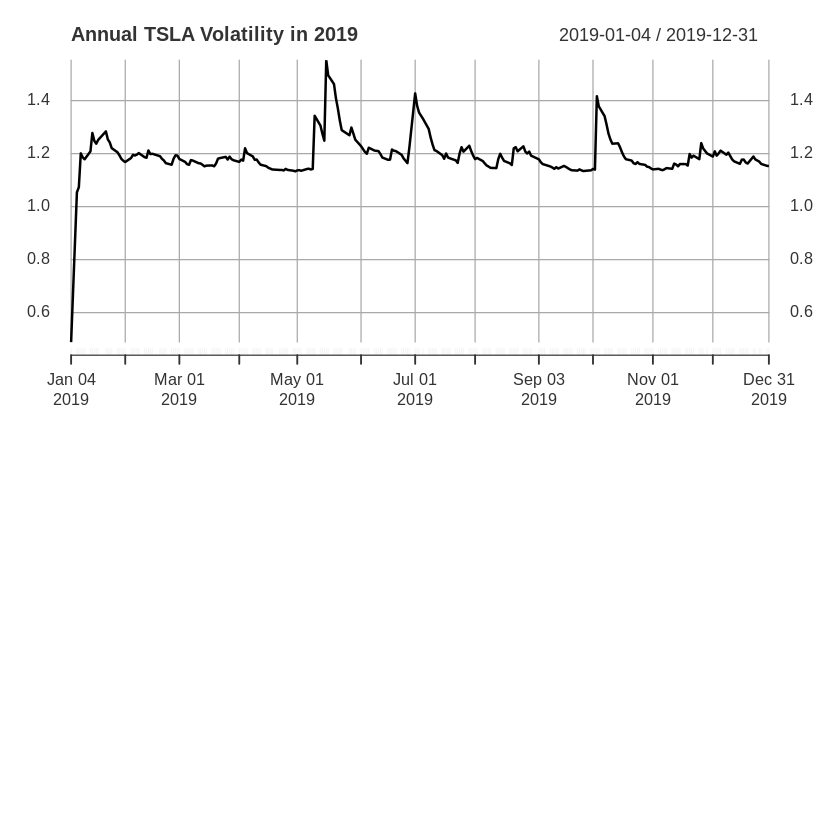

In [ ]:
# Compute the mean daily return
m <- mean(returns)

# Define the series of prediction errors
e <- returns - m

# Plot the absolute value of the prediction errors
par(mfrow = c(2,1),mar = c(3, 2, 2, 2))
plot(abs(e))

# Plot the acf of the absolute prediction errors
acf(abs(e))


e2 = e^2

#convert test to returns
returnstest <- CalculateReturns(test) %>% na.omit()

returnstest <- returnstest[-c(1),]


predvar <- rep(NA, length(returnstest))


# Compute the predicted variances
predvar[1] <- var(returnstest) 
for(t in 2:length(returnstest)){
   predvar[t] <- 0.001 + 0.1 * e2[t-1] + 0.8 * predvar[t-1]
}

# Create annualized predicted volatility
ann_predvol <- xts(sqrt(252) * sqrt(predvar), order.by = time(returnstest))

# Plot the annual predicted volatility in 2019
plot(ann_predvol["2019"], main = "Annual TSLA Volatility in 2019")


**Build GARCH Model**

For the standard GARCH model, we specify a constant to mean ARMA model, which means that arma0rder = c(0,0). We consider the GARCH(1,1) model and the distribution of the conditional error term is the normal distribution.


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001516    0.000641   2.3655 0.018006
omega   0.000005    0.000002   2.3767 0.017469
alpha1  0.020230    0.001926  10.5018 0.000000
beta1   0.975338    0.001246 782.9574 0.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.001516    0.000608   2.49381 0.012638
omega   0.000005    0.000006   0.77232 0.439927
alpha1  0.020230    0.005533   3.65646 0.000256
beta1   0.975338    0.001574 619.73362 0.000000

LogLikelihood : 4376.824 

Information Criteria
------------------------------------
                    
Akaike       -4.0906
Bayes        -4.0800
Shibata      -4.0906
Hannan-Quinn -4.0867



*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 12
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2018-12-31]:
       Series   Sigma
T+1  0.001516 0.03968
T+2  0.001516 0.03965
T+3  0.001516 0.03963
T+4  0.001516 0.03960
T+5  0.001516 0.03958
T+6  0.001516 0.03955
T+7  0.001516 0.03952
T+8  0.001516 0.03950
T+9  0.001516 0.03947
T+10 0.001516 0.03945
T+11 0.001516 0.03942
T+12 0.001516 0.03940



mu    omega   alpha1    beta1 
0.001516 0.000005 0.020230 0.975338

,Estimate,Std. Error,t value,Pr(>|t|)
mu,1.516028e-03,6.408925e-04,2.365494,0.01800601
omega,4.917927e-06,2.069231e-06,2.376693,0.01746860
alpha1,2.022968e-02,1.926304e-03,10.501808,0.00000000
beta1,9.753382e-01,1.245710e-03,782.957377,0.00000000



please wait...calculating quantiles...


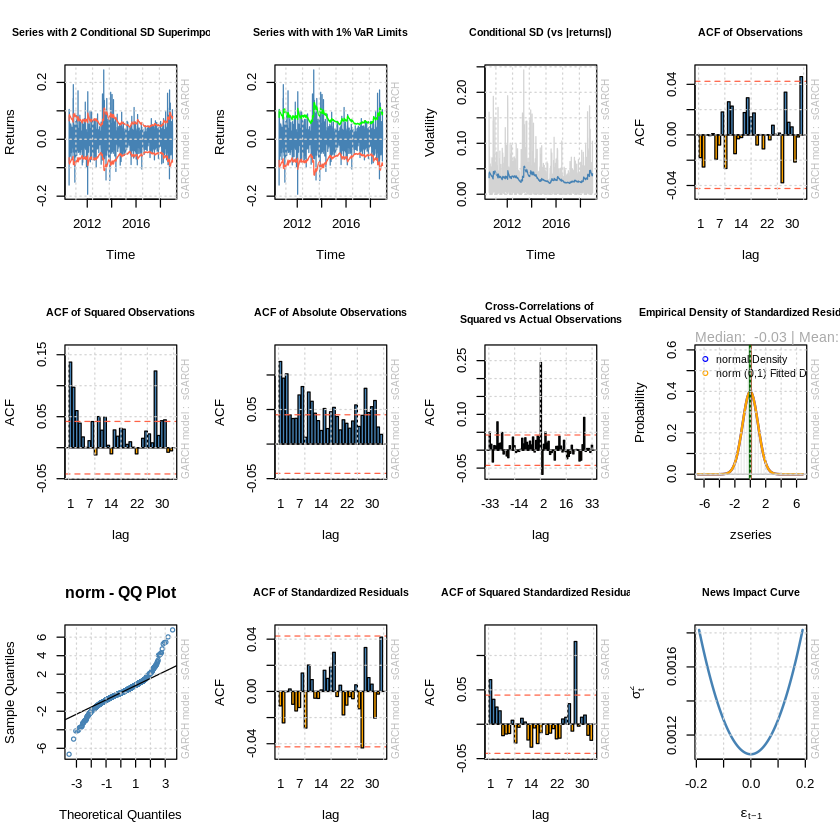

In [ ]:
# Specify a standard GARCH model with constant mean
garchspec <- ugarchspec(mean.model = list(armaOrder = c(0,0)),
                 variance.model = list(model = "sGARCH"),
                 distribution.model = "norm")

# Estimate the model
garchfit1 <- ugarchfit(returns, spec = garchspec)
garchfit1



#fcst_garchfit1 <- ugarchforecast(garchfit1,n.ahead=6,method=c("Partial","Full")[1])
fcst_garchfit1 <- ugarchforecast(garchfit1,n.ahead=12)
fcst_garchfit1

round(coef(garchfit1), 6)
garchfit1@fit$matcoef

plot(garchfit1, which = 'all')

In the model, we find that alpha1 + beta1 equal almost 1 meaning the predictions of their volatility are explosive, additionally the p values do not show significance for Adjusted Pear son's Goodness of fit, meaning the null hypothesis is that the conditional error term follows a normal distribution. The p values signify the hypothesis is rejected. As we can see, the normal distribution is rejected.

We can then view the model above and complete a volatility forecast for each analyzed stock. This forecast is represented in the below two plots. The first plot shows a flat line, as this is a constant mean model. The second plot shows whither the stock’s volatility is expected to increase or decrease.

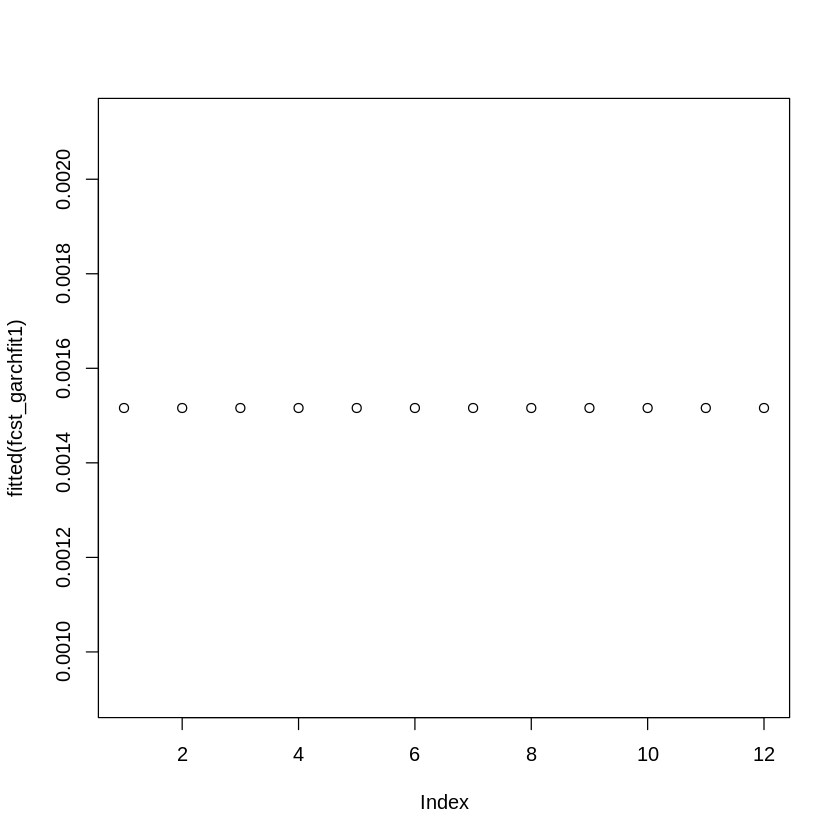

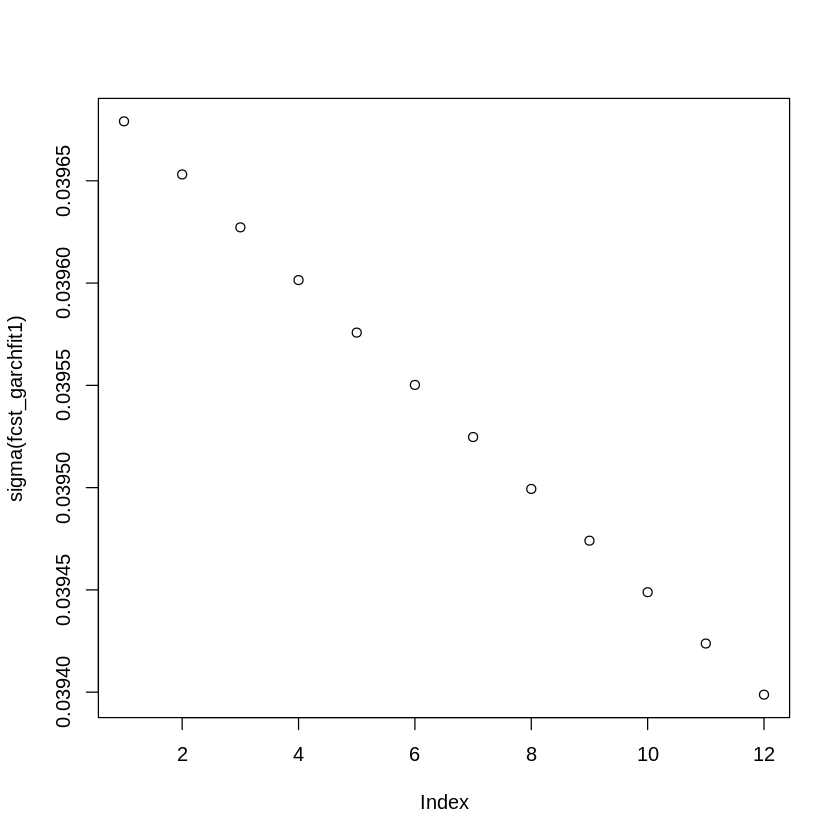

In [ ]:
#constant mean
plot(fitted(fcst_garchfit1))

#sigma
plot(sigma(fcst_garchfit1))

Let's re-run the Garch model adjusting the parameters

In [ ]:
# Specify a standard GARCH model with constant mean, adjust distribution to be student distribution
garchspec1 <- ugarchspec(mean.model = list(armaOrder = c(0,0)),
                 variance.model = list(model = "sGARCH"),
                 distribution.model = "sstd")

# Estimate the model
garchfit2 <- ugarchfit(returns, spec = garchspec1)
garchfit2



fcst_garchfit2 <- ugarchforecast(garchfit2,n.ahead=252,method=c("Partial","Full")[1])
fcst_garchfit2

round(coef(garchfit2), 6)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: sstd 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001546    0.000624   2.4799 0.013142
omega   0.000018    0.000006   2.8782 0.003999
alpha1  0.034895    0.009629   3.6238 0.000290
beta1   0.950269    0.006398 148.5224 0.000000
skew    1.034953    0.029400  35.2030 0.000000
shape   3.705785    0.313596  11.8171 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001546    0.000606   2.5538 0.010654
omega   0.000018    0.000011   1.6059 0.108307
alpha1  0.034895    0.018064   1.9318 0.053388
beta1   0.950269    0.004655 204.1469 0.000000
skew    1.034953    0.029963  34.5408 0.000000
shape   3.705785    0.373702   9.9164 0.000000

LogLike


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 252
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2018-12-31]:
        Series   Sigma
T+1   0.001546 0.03931
T+2   0.001546 0.03924
T+3   0.001546 0.03917
T+4   0.001546 0.03910
T+5   0.001546 0.03904
T+6   0.001546 0.03897
T+7   0.001546 0.03891
T+8   0.001546 0.03885
T+9   0.001546 0.03879
T+10  0.001546 0.03873
T+11  0.001546 0.03867
T+12  0.001546 0.03861
T+13  0.001546 0.03855
T+14  0.001546 0.03849
T+15  0.001546 0.03843
T+16  0.001546 0.03838
T+17  0.001546 0.03832
T+18  0.001546 0.03827
T+19  0.001546 0.03821
T+20  0.001546 0.03816
T+21  0.001546 0.03811
T+22  0.001546 0.03805
T+23  0.001546 0.03800
T+24  0.001546 0.03795
T+25  0.001546 0.03790
T+26  0.001546 0.03785
T+27  0.001546 0.03780
T+28  0.001546 0.03776
T+29  0.001546 0.03771
T+30  0.001546 0.03766
T+31  0.001546 0.03762
T+32  0.001546 0.03757
T+33  0.001546 0.03753
T+34  0.

mu    omega   alpha1    beta1     skew    shape 
0.001546 0.000018 0.034895 0.950269 1.034953 3.705785

Run a third model now adjusting arima order

In [ ]:
# Specify a standard GARCH model with constant mean, adjust distribution to be student distribution
garchspec2 <- ugarchspec(mean.model = list(armaOrder = c(1,1)),
                 variance.model = list(model = "sGARCH"),
                 distribution.model = "sstd")

# Estimate the model
garchfit3 <- ugarchfit(returns, spec = garchspec2)
garchfit3



fcst_garchfit3 <- ugarchforecast(garchfit3,n.ahead=252,method=c("Partial","Full")[1])
fcst_garchfit3

round(coef(garchfit3), 6)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: sstd 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001519    0.000568   2.6719 0.007541
ar1     0.791282    0.125859   6.2870 0.000000
ma1    -0.810587    0.120328  -6.7365 0.000000
omega   0.000017    0.000007   2.4631 0.013774
alpha1  0.034400    0.011203   3.0705 0.002137
beta1   0.950994    0.005948 159.8741 0.000000
skew    1.030001    0.029421  35.0084 0.000000
shape   3.699743    0.322939  11.4565 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001519    0.000587   2.5879 0.009657
ar1     0.791282    0.066823  11.8414 0.000000
ma1    -0.810587    0.064724 -12.5238 0.000000
omega   0.000017    0.000016   1.1003 0.271204
alpha1  


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 252
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2018-12-31]:
        Series   Sigma
T+1   0.001291 0.03915
T+2   0.001339 0.03909
T+3   0.001376 0.03903
T+4   0.001406 0.03896
T+5   0.001429 0.03890
T+6   0.001448 0.03884
T+7   0.001463 0.03878
T+8   0.001474 0.03872
T+9   0.001484 0.03866
T+10  0.001491 0.03860
T+11  0.001497 0.03854
T+12  0.001501 0.03848
T+13  0.001505 0.03843
T+14  0.001508 0.03837
T+15  0.001510 0.03831
T+16  0.001512 0.03826
T+17  0.001513 0.03821
T+18  0.001514 0.03815
T+19  0.001515 0.03810
T+20  0.001516 0.03805
T+21  0.001516 0.03800
T+22  0.001517 0.03795
T+23  0.001517 0.03790
T+24  0.001518 0.03785
T+25  0.001518 0.03780
T+26  0.001518 0.03776
T+27  0.001518 0.03771
T+28  0.001518 0.03766
T+29  0.001518 0.03762
T+30  0.001518 0.03757
T+31  0.001518 0.03753
T+32  0.001518 0.03748
T+33  0.001518 0.03744
T+34  0.

mu       ar1       ma1     omega    alpha1     beta1      skew     shape 
 0.001519  0.791282 -0.810587  0.000017  0.034400  0.950994  1.030001  3.699743

Now for our fourth model, let's use GJGarch to see if gamma paramater is significant enough to include


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: gjrGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: sstd 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001443    0.000624   2.3119 0.020781
omega   0.000019    0.000010   1.9686 0.049004
alpha1  0.029963    0.009806   3.0554 0.002248
beta1   0.943167    0.018102  52.1024 0.000000
gamma1  0.024111    0.016699   1.4439 0.148781
skew    1.030763    0.029431  35.0225 0.000000
shape   3.732121    0.310139  12.0337 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001443    0.000609   2.3712 0.017730
omega   0.000019    0.000014   1.3863 0.165653
alpha1  0.029963    0.011753   2.5494 0.010791
beta1   0.943167    0.027653  34.1070 0.000000
gamma1  0.024111    0.023600   1.0217 0.306945
skew  


please wait...calculating quantiles...


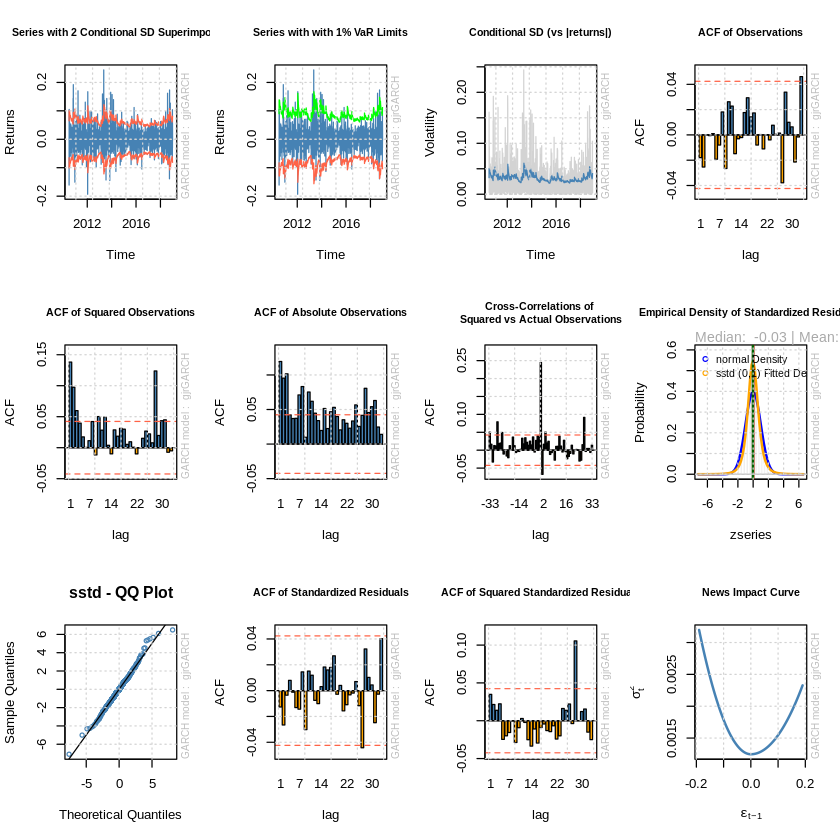

In [ ]:

garchspec3 <- ugarchspec(mean.model = list(armaOrder = c(0,0)),
                variance.model = list(model = "gjrGARCH"),
                distribution.model = 'sstd')
                
garchfit4 <- ugarchfit(returns, spec = garchspec3)
garchfit4
plot(garchfit4, which = 'all')

Now, run a fifth model with adjusted arima order and normal distribution


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001445    0.000596   2.4258 0.015275
ar1     0.785783    0.257852   3.0474 0.002308
ma1    -0.801186    0.249327  -3.2134 0.001312
omega   0.000005    0.000002   2.3286 0.019883
alpha1  0.020470    0.002138   9.5766 0.000000
beta1   0.974980    0.001376 708.7655 0.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.001445    0.000592   2.44009 0.014683
ar1     0.785783    0.194400   4.04210 0.000053
ma1    -0.801186    0.188756  -4.24457 0.000022
omega   0.000005    0.000007   0.72762 0.466846
alpha1  0.020470    0.006522   3.13871 0.001697
beta1   0.974980    0.001923 507.12817 0.000000




*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 12
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2018-12-31]:
       Series   Sigma
T+1  0.001516 0.03968
T+2  0.001516 0.03965
T+3  0.001516 0.03963
T+4  0.001516 0.03960
T+5  0.001516 0.03958
T+6  0.001516 0.03955
T+7  0.001516 0.03952
T+8  0.001516 0.03950
T+9  0.001516 0.03947
T+10 0.001516 0.03945
T+11 0.001516 0.03942
T+12 0.001516 0.03940



mu    omega   alpha1    beta1 
0.001516 0.000005 0.020230 0.975338

,Estimate,Std. Error,t value,Pr(>|t|)
mu,1.516028e-03,6.408925e-04,2.365494,0.01800601
omega,4.917927e-06,2.069231e-06,2.376693,0.01746860
alpha1,2.022968e-02,1.926304e-03,10.501808,0.00000000
beta1,9.753382e-01,1.245710e-03,782.957377,0.00000000



please wait...calculating quantiles...


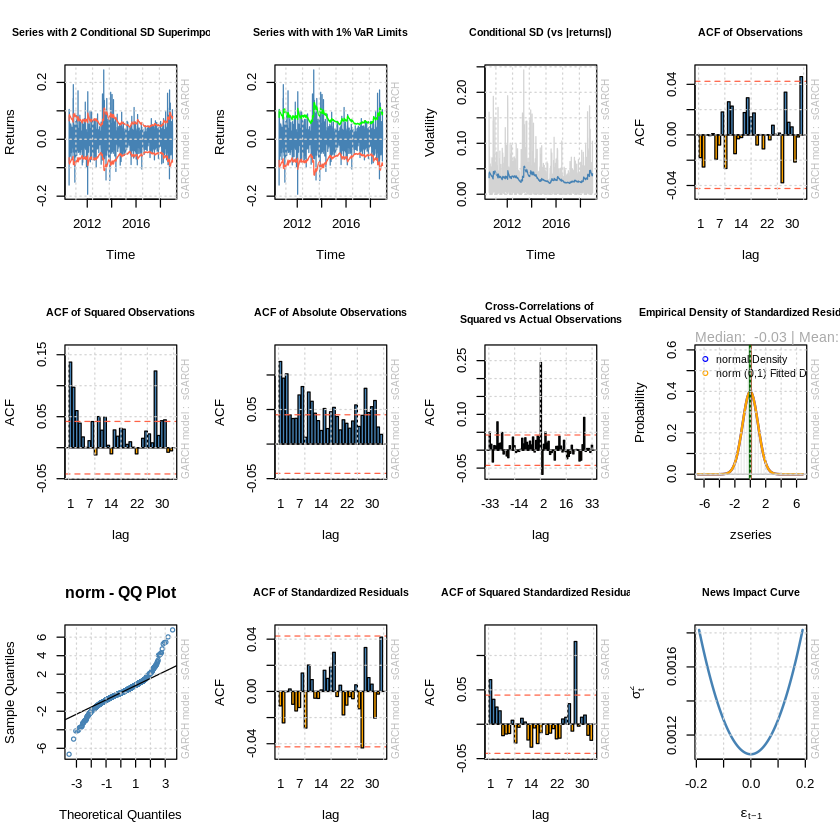

In [ ]:
# Specify a standard GARCH model with constant mean
garchspec4 <- ugarchspec(mean.model = list(armaOrder = c(1,1)),
                 variance.model = list(model = "sGARCH"),
                 distribution.model = "norm")

# Estimate the model
garchfit5 <- ugarchfit(returns, spec = garchspec4)
garchfit5




#fcst_garchfit1 <- ugarchforecast(garchfit1,n.ahead=6,method=c("Partial","Full")[1])
fcst_garchfit1 <- ugarchforecast(garchfit1,n.ahead=12)
fcst_garchfit1

round(coef(garchfit1), 6)
garchfit1@fit$matcoef

plot(garchfit1, which = 'all')

Compare models and select best performing one. Calculate likelihood and return results

In [ ]:
#calculate likelihood

likelihood(garchfit1)
likelihood(garchfit2)
likelihood(garchfit3)
likelihood(garchfit4)
likelihood(garchfit5)

[1] 4376.824

[1] 4564.069

[1] 4565.379

[1] 4565.384

[1] 4377.423

In [ ]:

#return information criteria

infocriteria(garchfit1)
infocriteria(garchfit2)
infocriteria(garchfit3)
infocriteria(garchfit4)
infocriteria(garchfit5)

,
Akaike,-4.090574
Bayes,-4.079971
Shibata,-4.090581
Hannan-Quinn,-4.086694


,
Akaike,-4.263863
Bayes,-4.247958
Shibata,-4.263879
Hannan-Quinn,-4.258042


,
Akaike,-4.263217
Bayes,-4.242010
Shibata,-4.263245
Hannan-Quinn,-4.255456


,
Akaike,-4.264157
Bayes,-4.245600
Shibata,-4.264178
Hannan-Quinn,-4.257366


,
Akaike,-4.089263
Bayes,-4.073358
Shibata,-4.089279
Hannan-Quinn,-4.083443



Out of the 5 models, Model # 5 is the best fit. It has the lowest AIC and information criteria, with all lags being statistically significant with p value < 5%. I am choosing to use AIC as my determinor vs likelihood due to it begin the best indicator of a GARCH model when the goal is forecasting. 


Next,use model to run simulation of precdicted prices based off volatility .


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001445    0.000596   2.4258 0.015275
ar1     0.785783    0.257852   3.0474 0.002308
ma1    -0.801186    0.249327  -3.2134 0.001312
omega   0.000005    0.000002   2.3286 0.019883
alpha1  0.020470    0.002138   9.5766 0.000000
beta1   0.974980    0.001376 708.7655 0.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.001445    0.000592   2.44009 0.014683
ar1     0.785783    0.194400   4.04210 0.000053
ma1    -0.801186    0.188756  -4.24457 0.000022
omega   0.000005    0.000007   0.72762 0.466846
alpha1  0.020470    0.006522   3.13871 0.001697
beta1   0.974980    0.001923 507.12817 0.000000



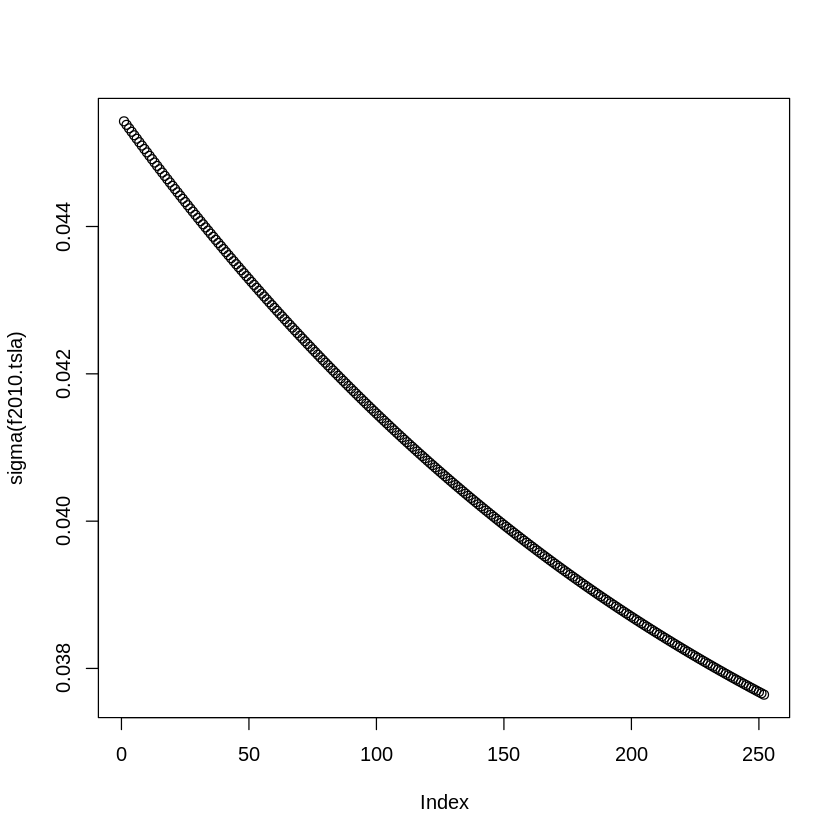

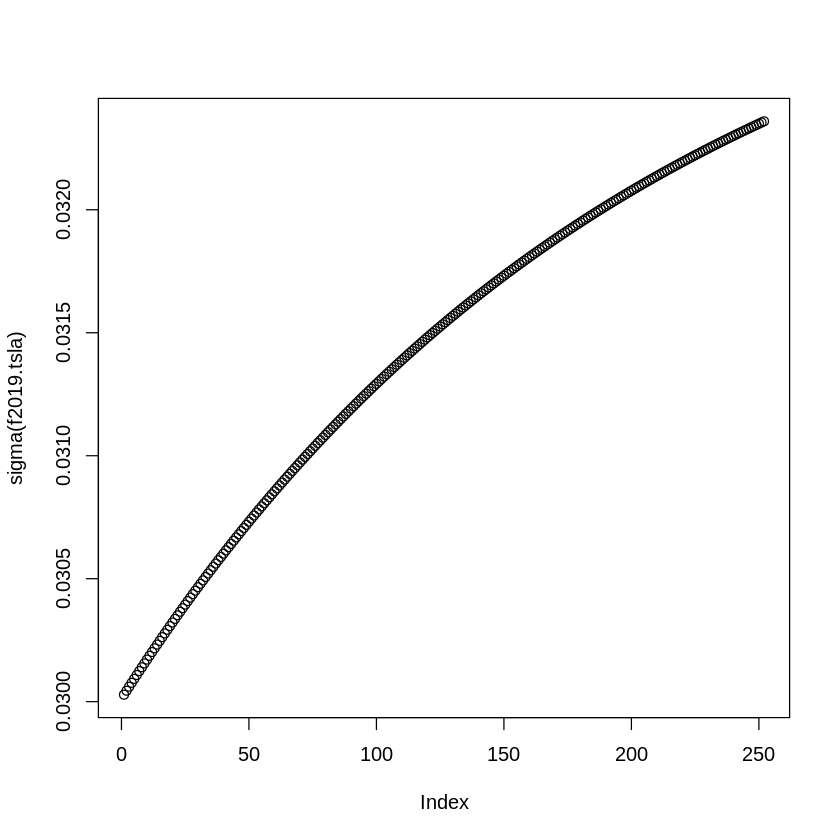

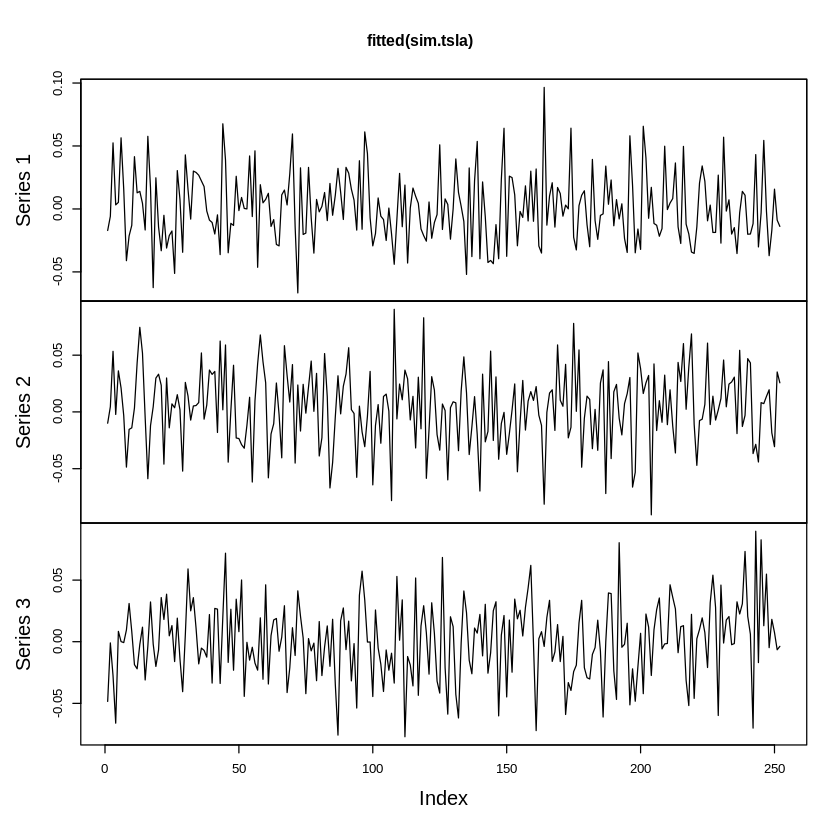

             [,1]
2018-12-21 63.954
2018-12-24 59.078
2018-12-26 65.218
2018-12-27 63.226
2018-12-28 66.774
2018-12-31 66.560

,V1,V2,V3,avg
,<dbl>,<dbl>,<dbl>,<dbl>
T+1,65.42326,65.89964,63.33638,64.88643
T+2,65.03564,66.20474,63.27165,64.83734
T+3,68.52637,69.75641,61.43509,66.57262
T+4,68.74318,69.61011,57.03747,65.13025
T+5,69.09105,72.01665,57.59601,66.23457
T+6,72.84884,73.42046,57.60365,67.95765
T+7,73.87780,73.19997,57.55618,68.21132
T+8,71.14426,69.96500,58.18998,66.43308
T+9,69.71845,68.94052,60.25379,66.30425


,ME,RMSE,MAE,MPE,MAPE
Test set,-26.88758,29.85464,26.88785,-54.78085,54.78123


,ME,RMSE,MAE,MPE,MAPE
Test set,-45.96466,48.69313,45.97934,-90.03846,90.05971


,ME,RMSE,MAE,MPE,MAPE
Test set,-5.80914,14.67989,12.37462,-14.35071,24.31492


,ME,RMSE,MAE,MPE,MAPE
Test set,-26.22046,28.68685,26.33989,-53.05667,53.23045


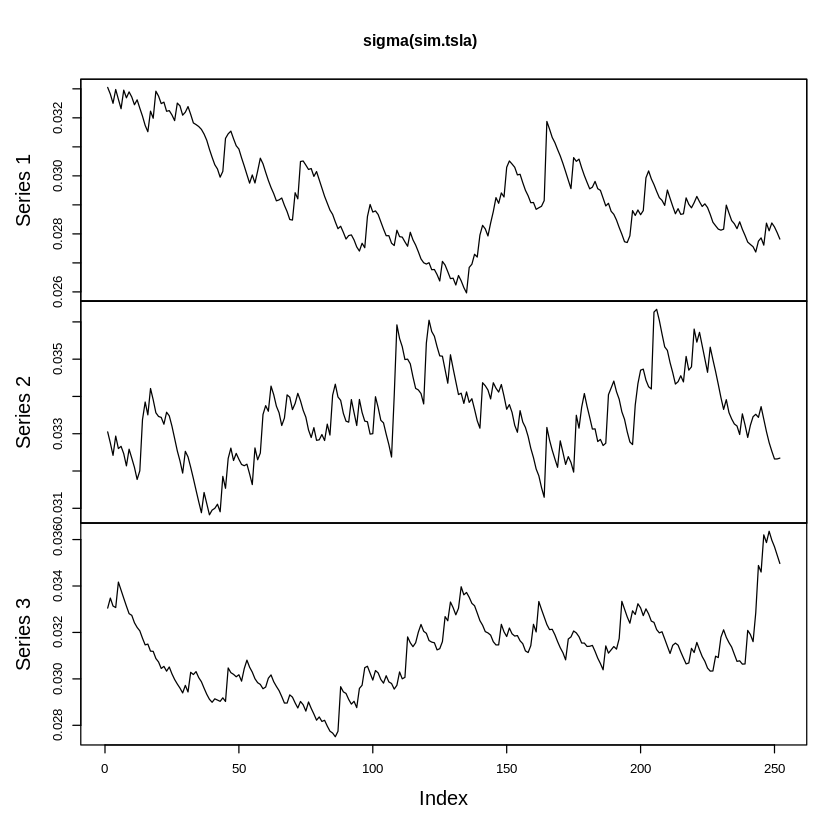

           p.tsla...3.
2019-01-02    63.33638
2019-01-03    63.27165
2019-01-04    61.43509
2019-01-07    57.03747
2019-01-08    57.59601
2019-01-09    57.60365
2019-01-10    57.55618
2019-01-11    58.18998
2019-01-14    60.25379
2019-01-15    60.80013
2019-01-16    59.56101
2019-01-17    58.09797
2019-01-18    57.94997
2019-01-22    58.73485
2019-01-23    56.66994
2019-01-24    56.42601
2019-01-25    58.57291
2019-01-28    58.44667
2019-01-29    57.11270
2019-01-30    56.67077
2019-01-31    59.05531
2019-02-01    60.25778
2019-02-04    62.82432
2019-02-05    63.14374
2019-02-06    64.01420
2019-02-07    62.94348
2019-02-08    64.21531
2019-02-11    63.27627
2019-02-12    60.57888
2019-02-13    60.95994
2019-02-14    64.88964
2019-02-15    66.55797
2019-02-19    68.93737
2019-02-20    69.67590
2019-02-21    68.47933
2019-02-22    68.13288
2019-02-25    67.66513
2019-02-26    66.83428
2019-02-27    68.30018
2019-02-28    66.06857
2019-03-01    67.86725
2019-03-04    69.62794
2019-03-05 

[1] 2392

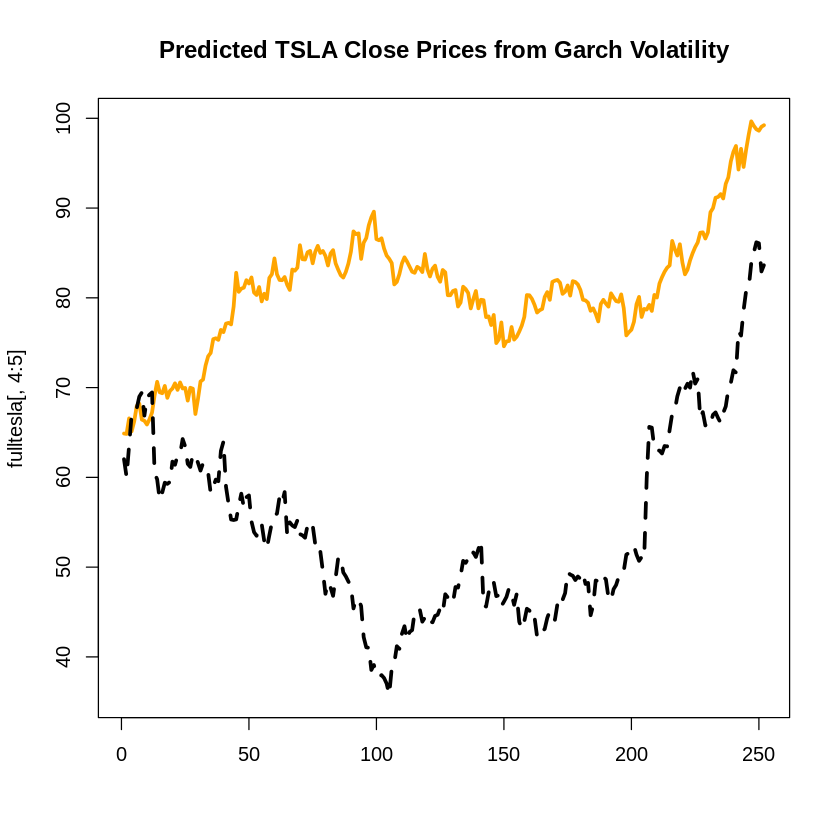

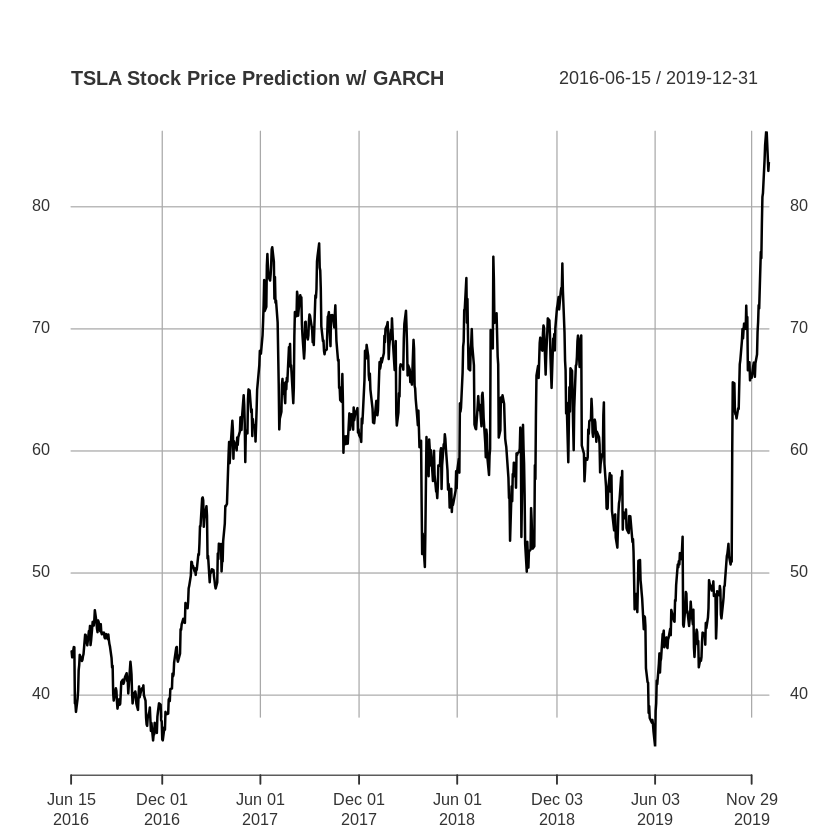

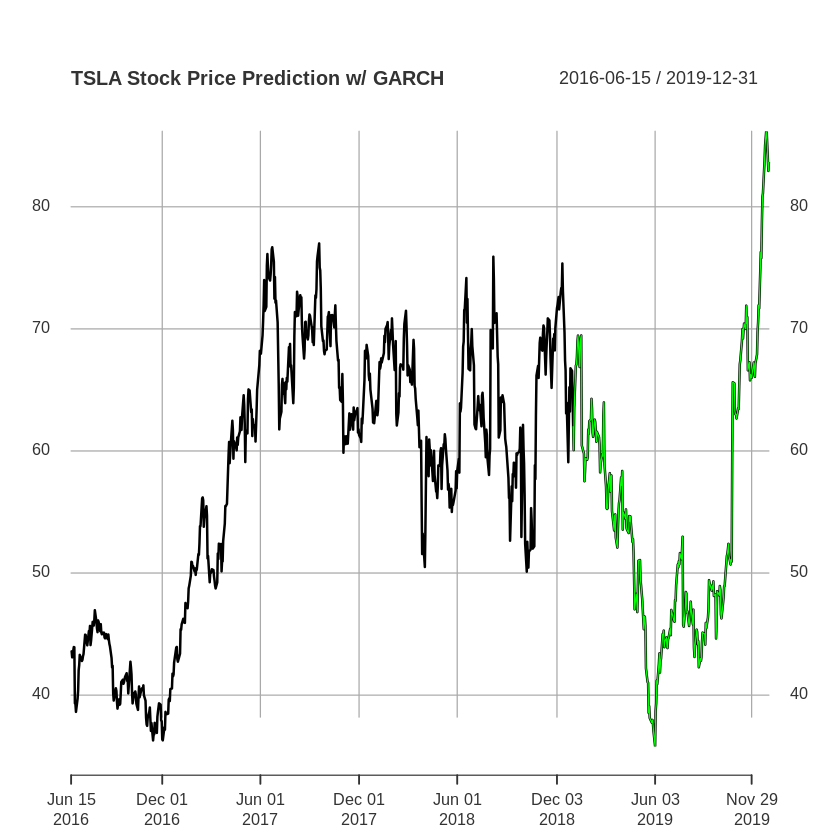

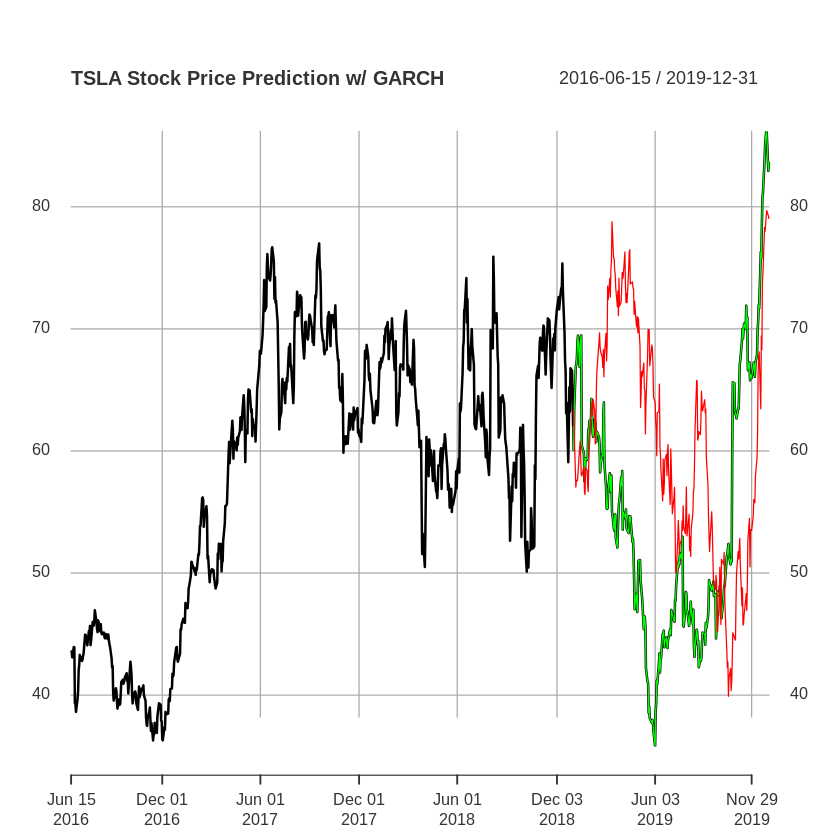

In [ ]:
# Specify a standard GARCH model with constant mean
garchspec4 <- ugarchspec(mean.model = list(armaOrder = c(1,1)),
                 variance.model = list(model = "sGARCH"),
                 distribution.model = "norm")

#use
garchfit5 


sfinal.tsla <- garchspec4

setfixed(sfinal.tsla) <- as.list(coef(garchfit5))

f2010.tsla <- ugarchforecast(data = returns["/2010-12"],
                        fitORspec = sfinal.tsla,
                        n.ahead = 252)
f2019.tsla <- ugarchforecast(data = returnstest["/2019-12"],
                        fitORspec = sfinal.tsla,
                        n.ahead = 252)
par(mfrow = c(1,1))
plot(sigma(f2010.tsla))
plot(sigma(f2019.tsla))

sim.tsla <- ugarchpath(spec = sfinal.tsla,
                  m.sim = 3,
                  n.sim = 1*252,
                  rseed = 123)
plot.zoo(fitted(sim.tsla))

plot.zoo(sigma(sim.tsla))




#get closing price from 2018
tail(train)

#predict prices based on last closed price of 2018
p.tsla <- 66.56*apply(fitted(sim.tsla), 2, 'cumsum') + 66.56

p.tsla <- as.data.frame(p.tsla)
p.tsla$avg <- rowMeans(p.tsla, na.rm=TRUE)
p.tsla



#check accruacy of each simulation as well as the avg of all 3 simulations
accuracy(p.tsla[,1],test)
accuracy(p.tsla[,2],test)
accuracy(p.tsla[,3],test)
accuracy(p.tsla[,4],test)

fulltesla<- cbind(p.tsla,test)

matplot(fulltesla[,4:5], type = "l", lwd = 3, col = c('orange','black'), main="Predicted TSLA Close Prices from Garch Volatility")
legend(0, 140, legend =  c("simavgprice","actual"), col = 1:5, lty= 1:5)

#prep data for plotting

full <- tsla_xts["2010-01/2019-12"]  # all closes in 2010-2018
update <- cbind(test, p.tsla[,3])

fcst <- update[,2]
fcst
nrow(full)

#plot
plot(full[1500:2392,], main = "TSLA Stock Price Prediction w/ GARCH")
lines(test, col="green")
lines(fcst, col="red")
legend("top",legend=c("Actual", "Forecast"),
       col=c("green", "red"))


Next, check the accuracy of a shorter time frame (GARCH is widely accepted at being a short term forecasting model)

In [ ]:
#check first 10 predictions

#check accruacy of each simulation as well as the avg of all 3 simulations
accuracy(p.tsla[1:10,1],test[1:10,])
accuracy(p.tsla[1:10,2],test[1:10,])
accuracy(p.tsla[1:10,3],test[1:10,])
accuracy(p.tsla[1:10,4],test[1:10,])

,ME,RMSE,MAE,MPE,MAPE
Test set,-3.164785,3.597913,3.171387,-4.852894,4.862478


,ME,RMSE,MAE,MPE,MAPE
Test set,-3.540649,4.221971,3.71645,-5.460773,5.715979


,ME,RMSE,MAE,MPE,MAPE
Test set,6.453366,8.211173,7.355772,9.42123,10.90969


,ME,RMSE,MAE,MPE,MAPE
Test set,-0.08402258,2.517779,2.098787,-0.297479,3.241625


# Neural Network

In [ ]:
#install.packages("e1071")
#library(e1071)
install.packages("keras")
install.packages("tensorflow")
install.packages("zoo")
install.packages("xts")
library(zoo)
library(xts)
library(keras)
library(tensorflow)

In [ ]:
tsla_zoo <- read.zoo(tsla)
tsla_xts<-as.xts(tsla_zoo)

In [ ]:
#scale_factors <- c(mean(tsla_xts$close), sd(tsla_xts$close))

ERROR: ignored

Splited as above

In [ ]:
train_y <- tsla_xts["2010-01/2018-12"] 
test_y <- tsla_xts["2019-01/2019-12"]  
head(train)
head(test)

            [,1]
2010-07-01 4.392
2010-07-02 3.840
2010-07-06 3.222
2010-07-07 3.160
2010-07-08 3.492
2010-07-09 3.480

             [,1]
2019-01-02 62.024
2019-01-03 60.072
2019-01-04 63.538
2019-01-07 66.992
2019-01-08 67.070
2019-01-09 67.706

In [ ]:
install.packages("PRROC")
install.packages("ROCR")
install.packages("NeuralNetTools")
install.packages("glmnet")
install.packages("FNN")
install.packages("rpart.plot")
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("dplyr") # used for data munging 
library("FNN") # used for knn regression (knn.reg function)
#library("caret") # used for various predictive models
library("class") # for using confusion matrix function
library("rpart.plot") # used to plot decision tree
library("rpart")  # used for Regression tree
library("glmnet") # used for Lasso and Ridge regression
library('NeuralNetTools') # used to plot Neural Networks
library("PRROC") # top plot ROC curve
library("ROCR") # top plot lift curve
library("tidyverse")

Loading required package: rpart

Loading required package: Matrix

Loaded glmnet 4.1-4

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ readr   2.1.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::first()  masks xts::first()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::last()   masks xts::last()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()



In [ ]:
tsla = df[, c('Date', 'Close')]
tsla$time = seq(1,2843, by =1)

In [ ]:
y = tsla %>% select("Close")
x = tsla %>% select("time")

In [ ]:
# set the seed to make the partition reproducible
set.seed(1234) 

In [ ]:
# 75% of data is used for training and the rest for testing model performace, to get 2140 observations
smp_size <- floor(0.752726 * nrow(x))

In [ ]:
# randomly select row numbers for training data set
train_ind <- sample(seq_len(nrow(x)), size = smp_size)

In [ ]:
# creating test and training sets for x
x_train <- as.data.frame(x[train_ind, ])
x_test <- as.data.frame(x[-train_ind, ])

In [ ]:
# creating test and training sets for y
y_train <- as.data.frame(y[train_ind, ])
y_test <- as.data.frame(y[-train_ind, ])

In [ ]:
summary(y_train)

 y[train_ind, ]   
 Min.   :  3.160  
 1st Qu.:  9.014  
 Median : 45.934  
 Mean   :103.077  
 3rd Qu.: 65.192  
 Max.   :883.090  

In [ ]:
y_train_l <- as.factor(ifelse(y_train > 103, "YES", "NO"))
y_test_l <- as.factor(ifelse(y_test > 103, "YES", "NO"))

Neural Network in r 

In [ ]:
# Neural network algorithm
nn_reg_fit <- train(x_train, y_train_l, method ="nnet", trace = F, lineout  =0, stepmax = 100, threshold = 0.01)
print(nn_reg_fit)

ERROR: ignored

In [ ]:
# Plotting neural network
plotnet(nn_reg_fit$finalModel)

In [ ]:
# prediction 
nn_predict <- predict(nn_reg_fit, x_train)
View(nn_predict)

In [ ]:
# use metric library to get rmse
library(Metrics)
rmse(nn_reg_fit)

In [ ]:
rmse <- sqrt(sum((y_test-nn_predict)^2)/length(nn_predict))